# Online News Popularity Data set

## Performing exploratory data analysis on the dataset.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from copy import copy

In [2]:
#Loading data
ONP = pd.read_csv('C:/Users/meysam/Desktop/My Python Stuff/SBU/Machine Learning/OnlineNewsPopularity/OnlineNewsPopularity.csv')

#Taking a quick look at our data
ONP.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


Basic information about data

In [3]:
#basic information
ONP.info()

#describe the data
ONP.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


Duplicate values

In [4]:
#Find the duplicates
ONP.duplicated().sum()

0

Unique values in the data

In [5]:
print(ONP[' data_channel_is_lifestyle'].unique())
print(ONP[' data_channel_is_entertainment'].unique())
print(ONP[' data_channel_is_bus'].unique())
print(ONP[' data_channel_is_socmed'].unique())
print(ONP[' data_channel_is_tech'].unique())
print(ONP[' data_channel_is_world'].unique())
print(ONP[' weekday_is_monday'].unique())
print(ONP[' weekday_is_tuesday'].unique())
print(ONP[' weekday_is_wednesday'].unique())
print(ONP[' weekday_is_thursday'].unique())
print(ONP[' weekday_is_friday'].unique())
print(ONP[' weekday_is_saturday'].unique())
print(ONP[' weekday_is_sunday'].unique())
print(ONP[' is_weekend'].unique())

[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]


Visualize the Unique counts

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' data_channel_is_lifestyle', ylabel='count'>

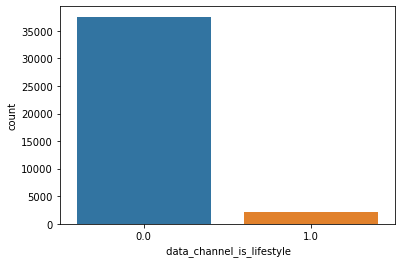

In [6]:
sns.countplot(ONP[' data_channel_is_lifestyle'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' data_channel_is_entertainment', ylabel='count'>

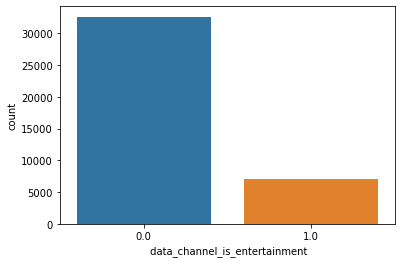

In [7]:
sns.countplot(ONP[' data_channel_is_entertainment'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' data_channel_is_bus', ylabel='count'>

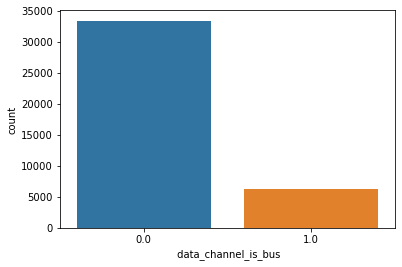

In [8]:
sns.countplot(ONP[' data_channel_is_bus'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' data_channel_is_socmed', ylabel='count'>

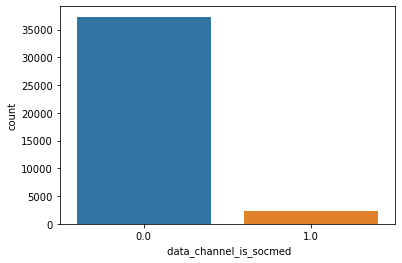

In [9]:
sns.countplot(ONP[' data_channel_is_socmed'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' data_channel_is_tech', ylabel='count'>

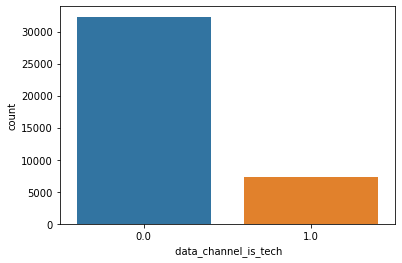

In [10]:
sns.countplot(ONP[' data_channel_is_tech'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' data_channel_is_world', ylabel='count'>

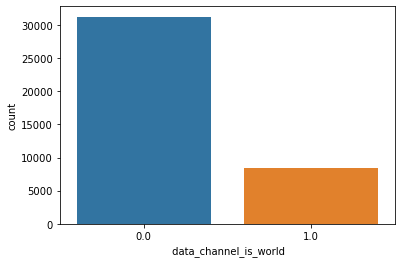

In [11]:
sns.countplot(ONP[' data_channel_is_world'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' weekday_is_monday', ylabel='count'>

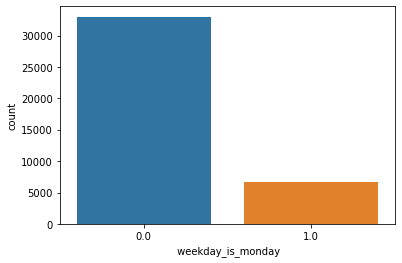

In [12]:
sns.countplot(ONP[' weekday_is_monday'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' weekday_is_tuesday', ylabel='count'>

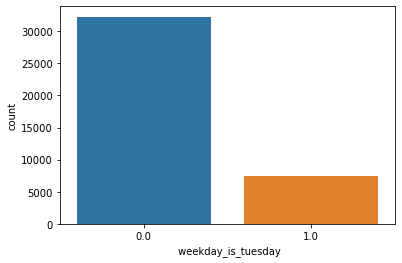

In [13]:
sns.countplot(ONP[' weekday_is_tuesday'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' weekday_is_wednesday', ylabel='count'>

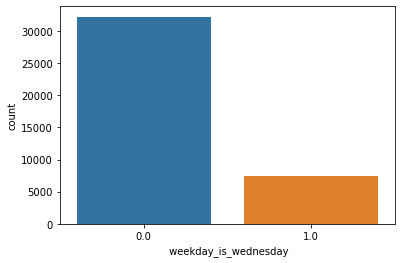

In [14]:
sns.countplot(ONP[' weekday_is_wednesday'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' weekday_is_thursday', ylabel='count'>

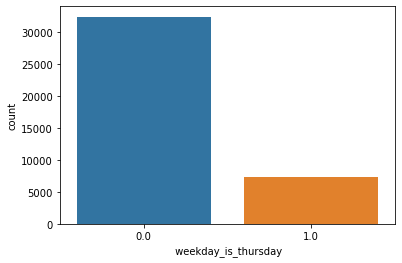

In [15]:
sns.countplot(ONP[' weekday_is_thursday'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' weekday_is_friday', ylabel='count'>

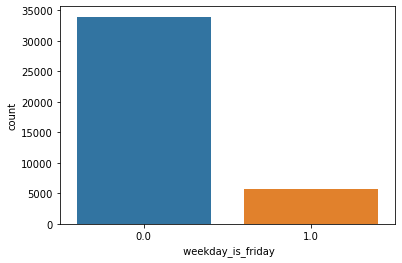

In [16]:
sns.countplot(ONP[' weekday_is_friday'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' weekday_is_saturday', ylabel='count'>

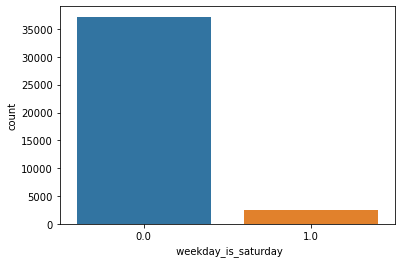

In [17]:
sns.countplot(ONP[' weekday_is_saturday'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' weekday_is_sunday', ylabel='count'>

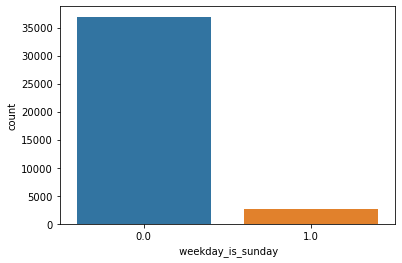

In [18]:
sns.countplot(ONP[' weekday_is_sunday'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' is_weekend', ylabel='count'>

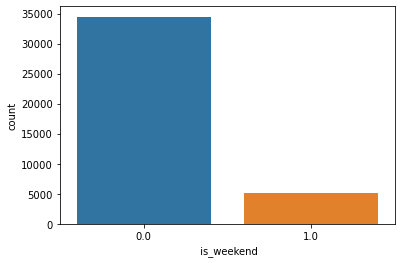

In [19]:
sns.countplot(ONP[' is_weekend'])

Find the Null values

In [20]:
var = ONP.isnull().sum()
print(var.to_string())

url                               0
 timedelta                        0
 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                 

Know the datatypes

In [21]:
var1 = ONP.dtypes
print(var1.to_string())

url                                object
 timedelta                        float64
 n_tokens_title                   float64
 n_tokens_content                 float64
 n_unique_tokens                  float64
 n_non_stop_words                 float64
 n_non_stop_unique_tokens         float64
 num_hrefs                        float64
 num_self_hrefs                   float64
 num_imgs                         float64
 num_videos                       float64
 average_token_length             float64
 num_keywords                     float64
 data_channel_is_lifestyle        float64
 data_channel_is_entertainment    float64
 data_channel_is_bus              float64
 data_channel_is_socmed           float64
 data_channel_is_tech             float64
 data_channel_is_world            float64
 kw_min_min                       float64
 kw_max_min                       float64
 kw_avg_min                       float64
 kw_min_max                       float64
 kw_max_max                       

Correlation plot

In [23]:
ONP.corr()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
timedelta,1.000000,-0.240320,-0.062867,0.002866,0.000089,0.003805,-0.000832,0.064530,-0.027636,0.000936,...,0.054772,0.098288,-0.000507,0.062175,-0.063239,-0.015919,0.038711,0.011551,-0.002745,0.008662
n_tokens_title,-0.240320,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,...,-0.025069,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550,0.008783
n_tokens_content,-0.062867,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,...,-0.261493,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439,0.002459
n_unique_tokens,0.002866,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,...,0.009193,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217,0.000806
n_non_stop_words,0.000089,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,...,0.000904,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391,0.000443
n_non_stop_unique_tokens,0.003805,-0.005420,0.000373,0.999852,0.999532,1.000000,-0.004983,0.007584,0.014230,-0.000963,...,0.008380,-0.002245,-0.001972,0.004318,-0.006708,-0.005860,-0.002910,-0.008572,-0.005342,0.000114
num_hrefs,-0.000832,-0.053496,0.423065,-0.004352,0.005521,-0.004983,1.000000,0.396452,0.342633,0.114518,...,-0.082168,0.286733,-0.152146,-0.263576,0.054948,0.043950,0.039041,0.009443,0.056525,0.045404
num_self_hrefs,0.064530,-0.014856,0.304682,0.006620,0.013598,0.007584,0.396452,1.000000,0.238586,0.077458,...,-0.072648,0.189922,-0.058222,-0.122071,0.039153,-0.011239,0.026224,0.008961,-0.006709,-0.001900
num_imgs,-0.027636,-0.008858,0.342600,0.018802,0.028486,0.014230,0.342633,0.238586,1.000000,-0.067336,...,-0.024683,0.155232,-0.072500,-0.136522,0.042644,0.056815,0.046310,-0.013759,0.063307,0.039388
num_videos,0.000936,0.051460,0.103699,-0.000597,-0.000899,-0.000963,0.114518,0.077458,-0.067336,1.000000,...,-0.010103,0.125659,-0.115976,-0.138190,0.027251,0.061028,0.021980,-0.021982,0.055231,0.023936


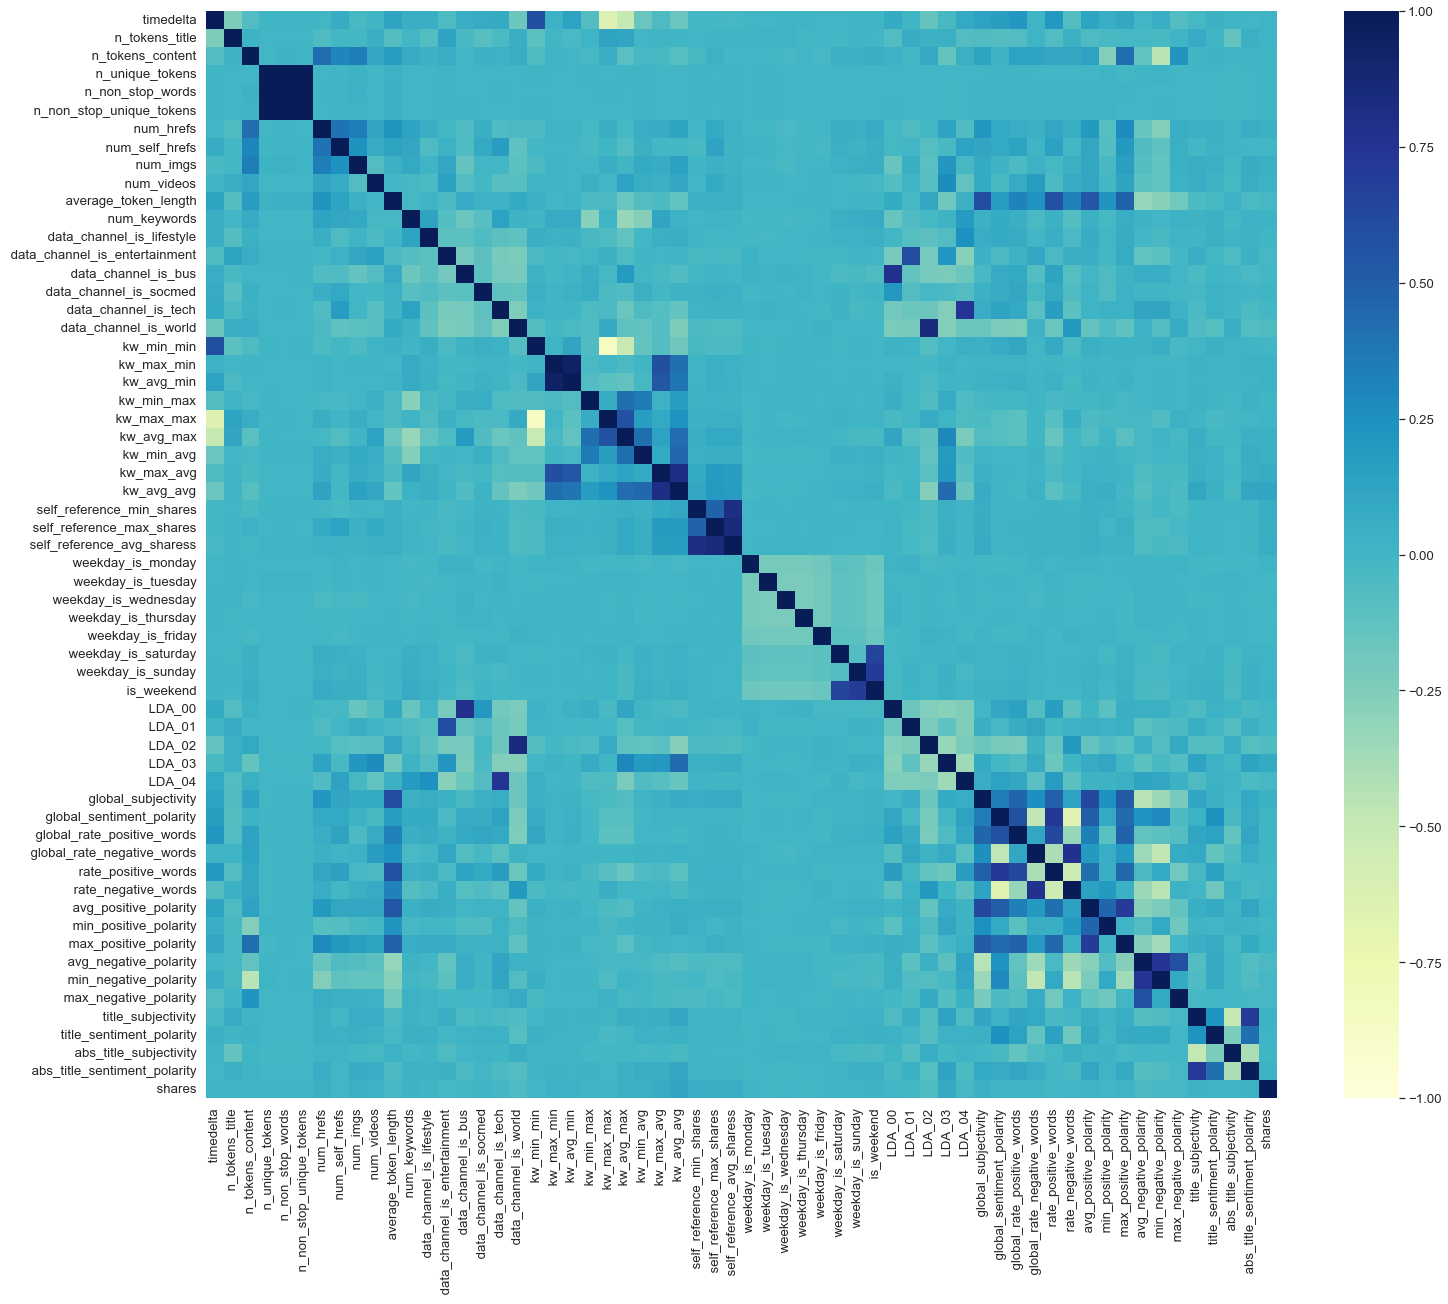

In [24]:
plt.figure(figsize = (24,20))
sns.set(font_scale = 1.2)
sns.heatmap(ONP.corr(), cmap="YlGnBu", vmin = -1, vmax = 1)
plt.show()

Histogram

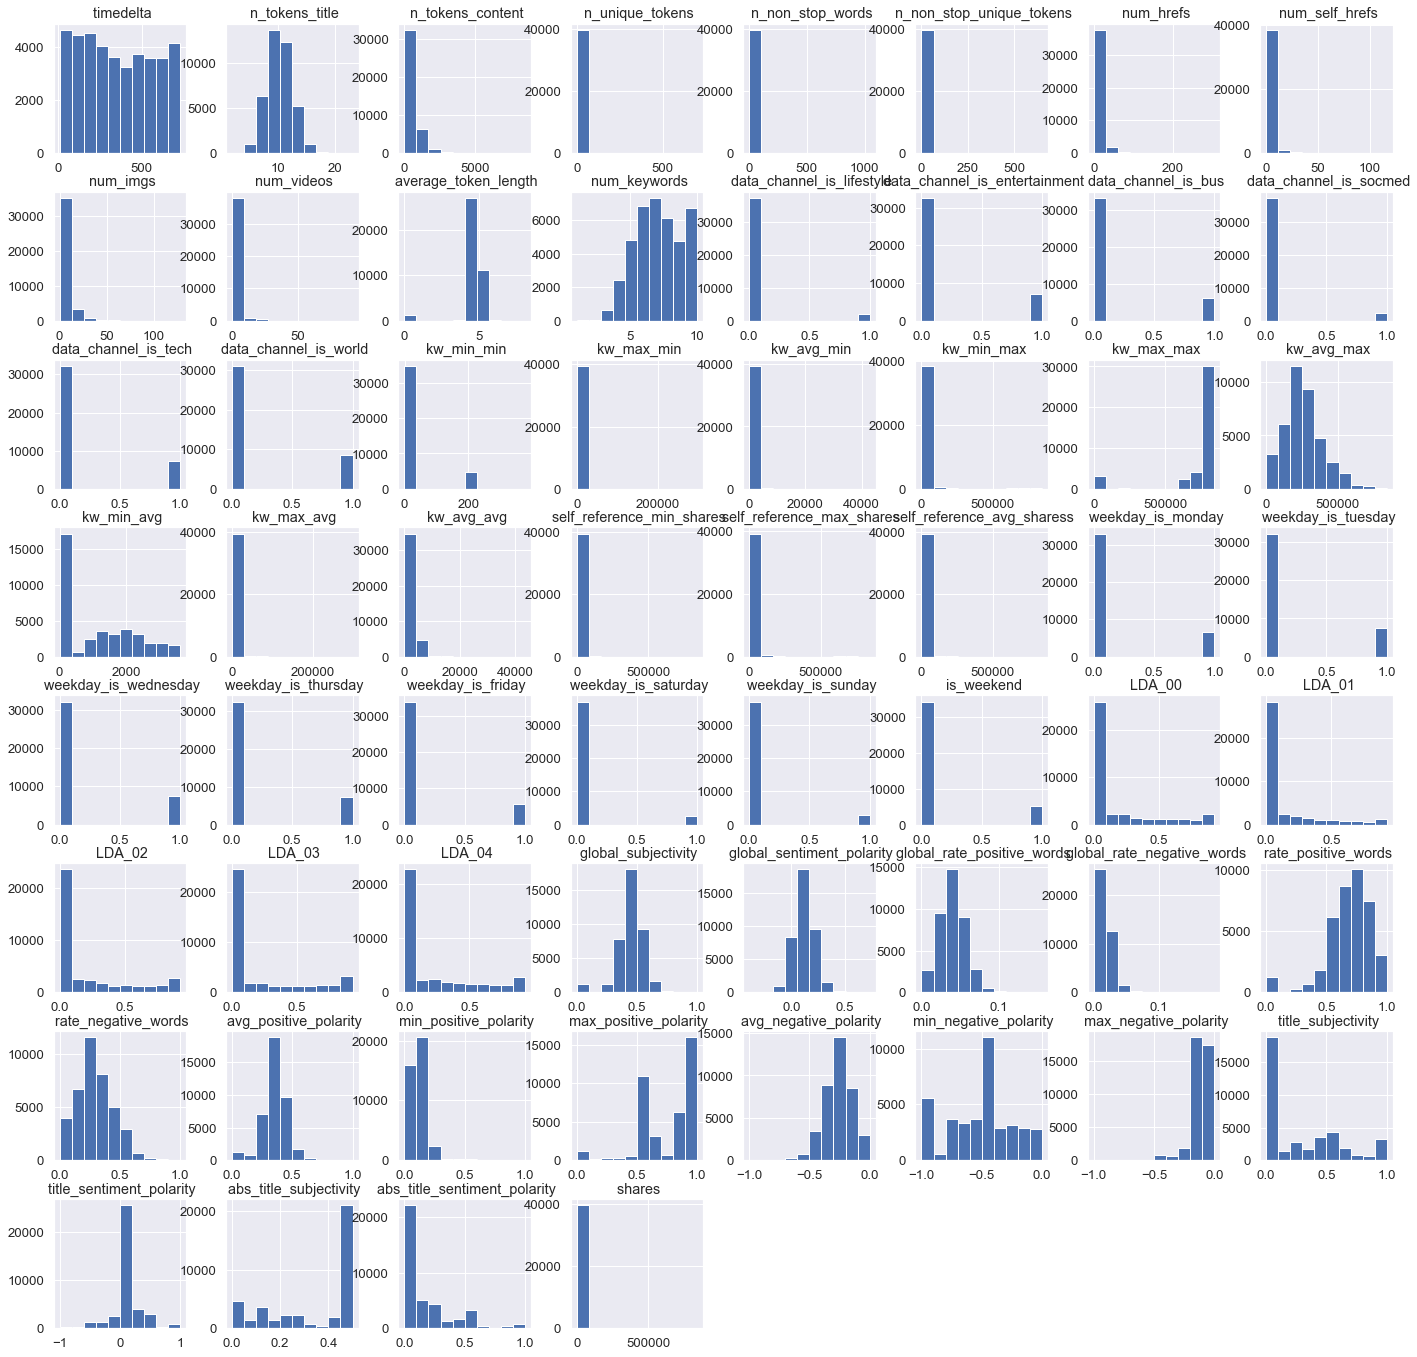

In [25]:
ONP.hist(figsize=(24,24))
plt.show()

## Propose 5 different hypothesis tests related to the dataset. At least use 3 different tests.

**Normality test**

Anderson-Darling Test

In [26]:
from scipy.stats import normaltest
for i in range(len(num_cols)):
    data = ONP[num_cols[i]]
    stat, p = normaltest(data)
    print('%s \n stat=%.3f, p=%.3f' % (ONP.columns[i] ,stat, p))
    if p > 0.05 :
                         print('Probably Gaussian')
    else:
                         print('Probably not Gaussian')

url 
 stat=66833.600, p=0.000
Probably not Gaussian
 timedelta 
 stat=178.224, p=0.000
Probably not Gaussian
 n_tokens_title 
 stat=27067.172, p=0.000
Probably not Gaussian
 n_tokens_content 
 stat=193580.065, p=0.000
Probably not Gaussian
 n_unique_tokens 
 stat=193618.279, p=0.000
Probably not Gaussian
 n_non_stop_words 
 stat=193521.080, p=0.000
Probably not Gaussian
 n_non_stop_unique_tokens 
 stat=35089.867, p=0.000
Probably not Gaussian
 num_hrefs 
 stat=42092.026, p=0.000
Probably not Gaussian
 num_self_hrefs 
 stat=33335.093, p=0.000
Probably not Gaussian
 num_imgs 
 stat=50233.038, p=0.000
Probably not Gaussian
 num_videos 
 stat=35953.551, p=0.000
Probably not Gaussian
 average_token_length 
 stat=3606.427, p=0.000
Probably not Gaussian
 num_keywords 
 stat=31327.772, p=0.000
Probably not Gaussian
 data_channel_is_lifestyle 
 stat=10129.254, p=0.000
Probably not Gaussian
 data_channel_is_entertainment 
 stat=12191.763, p=0.000
Probably not Gaussian
 data_channel_is_bus 
 stat

**Correlation Tests**

Kendall’s Rank Correlation

In [27]:
from scipy.stats import kendalltau
for i in range(len(num_cols)):
    for j in range(len(num_cols)):
        if i == j:
            pass
        else:
            data1 = ONP[num_cols[i]]
            data2 = ONP[num_cols[j]]
            stat, p = kendalltau(data1, data2)
            print('%s , %s \n stat=%.3f, p=%.3f' % (ONP.columns[i] ,ONP.columns[j] ,stat, p))
            if p > 0.05:
                print('Probably independent')
            else:
                print('Probably dependent')

url ,  timedelta 
 stat=-0.168, p=0.000
Probably dependent
url ,  n_tokens_title 
 stat=-0.050, p=0.000
Probably dependent
url ,  n_tokens_content 
 stat=0.112, p=0.000
Probably dependent
url ,  n_unique_tokens 
 stat=-0.050, p=0.000
Probably dependent
url ,  n_non_stop_words 
 stat=0.100, p=0.000
Probably dependent
url ,  n_non_stop_unique_tokens 
 stat=0.017, p=0.000
Probably dependent
url ,  num_hrefs 
 stat=0.044, p=0.000
Probably dependent
url ,  num_self_hrefs 
 stat=-0.115, p=0.000
Probably dependent
url ,  num_imgs 
 stat=-0.100, p=0.000
Probably dependent
url ,  num_videos 
 stat=-0.007, p=0.049
Probably dependent
url ,  average_token_length 
 stat=0.036, p=0.000
Probably dependent
url ,  num_keywords 
 stat=0.044, p=0.000
Probably dependent
url ,  data_channel_is_lifestyle 
 stat=-0.039, p=0.000
Probably dependent
url ,  data_channel_is_entertainment 
 stat=0.047, p=0.000
Probably dependent
url ,  data_channel_is_bus 
 stat=0.063, p=0.000
Probably dependent
url ,  data_channe

 n_tokens_title ,  kw_min_max 
 stat=0.064, p=0.000
Probably dependent
 n_tokens_title ,  kw_max_max 
 stat=-0.075, p=0.000
Probably dependent
 n_tokens_title ,  kw_avg_max 
 stat=-0.032, p=0.000
Probably dependent
 n_tokens_title ,  kw_min_avg 
 stat=-0.061, p=0.000
Probably dependent
 n_tokens_title ,  kw_max_avg 
 stat=-0.085, p=0.000
Probably dependent
 n_tokens_title ,  kw_avg_avg 
 stat=-0.048, p=0.000
Probably dependent
 n_tokens_title ,  self_reference_min_shares 
 stat=0.064, p=0.000
Probably dependent
 n_tokens_title ,  self_reference_max_shares 
 stat=0.027, p=0.000
Probably dependent
 n_tokens_title ,  self_reference_avg_sharess 
 stat=-0.000, p=0.938
Probably independent
 n_tokens_title ,  weekday_is_monday 
 stat=-0.007, p=0.101
Probably independent
 n_tokens_title ,  weekday_is_tuesday 
 stat=-0.009, p=0.023
Probably dependent
 n_tokens_title ,  weekday_is_wednesday 
 stat=-0.009, p=0.028
Probably dependent
 n_tokens_title ,  weekday_is_thursday 
 stat=-0.013, p=0.002
Pr

 n_unique_tokens ,  kw_max_min 
 stat=0.005, p=0.140
Probably independent
 n_unique_tokens ,  kw_avg_min 
 stat=-0.019, p=0.000
Probably dependent
 n_unique_tokens ,  kw_min_max 
 stat=0.066, p=0.000
Probably dependent
 n_unique_tokens ,  kw_max_max 
 stat=-0.070, p=0.000
Probably dependent
 n_unique_tokens ,  kw_avg_max 
 stat=-0.029, p=0.000
Probably dependent
 n_unique_tokens ,  kw_min_avg 
 stat=-0.052, p=0.000
Probably dependent
 n_unique_tokens ,  kw_max_avg 
 stat=-0.075, p=0.000
Probably dependent
 n_unique_tokens ,  kw_avg_avg 
 stat=-0.046, p=0.000
Probably dependent
 n_unique_tokens ,  self_reference_min_shares 
 stat=0.070, p=0.000
Probably dependent
 n_unique_tokens ,  self_reference_max_shares 
 stat=0.032, p=0.000
Probably dependent
 n_unique_tokens ,  self_reference_avg_sharess 
 stat=0.000, p=0.946
Probably independent
 n_unique_tokens ,  weekday_is_monday 
 stat=-0.007, p=0.088
Probably independent
 n_unique_tokens ,  weekday_is_tuesday 
 stat=-0.011, p=0.006
Probably

 n_non_stop_unique_tokens ,  kw_min_avg 
 stat=0.073, p=0.000
Probably dependent
 n_non_stop_unique_tokens ,  kw_max_avg 
 stat=0.062, p=0.000
Probably dependent
 n_non_stop_unique_tokens ,  kw_avg_avg 
 stat=0.010, p=0.003
Probably dependent
 n_non_stop_unique_tokens ,  self_reference_min_shares 
 stat=0.148, p=0.000
Probably dependent
 n_non_stop_unique_tokens ,  self_reference_max_shares 
 stat=0.110, p=0.000
Probably dependent
 n_non_stop_unique_tokens ,  self_reference_avg_sharess 
 stat=-0.004, p=0.347
Probably independent
 n_non_stop_unique_tokens ,  weekday_is_monday 
 stat=-0.013, p=0.003
Probably dependent
 n_non_stop_unique_tokens ,  weekday_is_tuesday 
 stat=-0.027, p=0.000
Probably dependent
 n_non_stop_unique_tokens ,  weekday_is_wednesday 
 stat=-0.013, p=0.002
Probably dependent
 n_non_stop_unique_tokens ,  weekday_is_thursday 
 stat=-0.002, p=0.693
Probably independent
 n_non_stop_unique_tokens ,  weekday_is_friday 
 stat=0.054, p=0.000
Probably dependent
 n_non_stop_u

 num_self_hrefs ,  is_weekend 
 stat=-0.087, p=0.000
Probably dependent
 num_self_hrefs ,  LDA_00 
 stat=-0.024, p=0.000
Probably dependent
 num_self_hrefs ,  LDA_01 
 stat=-0.044, p=0.000
Probably dependent
 num_self_hrefs ,  LDA_02 
 stat=0.020, p=0.000
Probably dependent
 num_self_hrefs ,  LDA_03 
 stat=0.005, p=0.161
Probably independent
 num_self_hrefs ,  LDA_04 
 stat=0.086, p=0.000
Probably dependent
 num_self_hrefs ,  global_subjectivity 
 stat=0.035, p=0.000
Probably dependent
 num_self_hrefs ,  global_sentiment_polarity 
 stat=-0.006, p=0.081
Probably independent
 num_self_hrefs ,  global_rate_positive_words 
 stat=0.047, p=0.000
Probably dependent
 num_self_hrefs ,  global_rate_negative_words 
 stat=-0.002, p=0.593
Probably independent
 num_self_hrefs ,  rate_positive_words 
 stat=0.056, p=0.000
Probably dependent
 num_self_hrefs ,  rate_negative_words 
 stat=0.077, p=0.000
Probably dependent
 num_self_hrefs ,  avg_positive_polarity 
 stat=-0.044, p=0.000
Probably dependent


 num_videos ,  is_weekend 
 stat=0.012, p=0.000
Probably dependent
 num_videos ,  LDA_00 
 stat=-0.058, p=0.000
Probably dependent
 num_videos ,  LDA_01 
 stat=0.160, p=0.000
Probably dependent
 num_videos ,  LDA_02 
 stat=-0.073, p=0.000
Probably dependent
 num_videos ,  LDA_03 
 stat=-0.059, p=0.000
Probably dependent
 num_videos ,  LDA_04 
 stat=-0.046, p=0.000
Probably dependent
 num_videos ,  global_subjectivity 
 stat=-0.021, p=0.000
Probably dependent
 num_videos ,  global_sentiment_polarity 
 stat=-0.077, p=0.000
Probably dependent
 num_videos ,  global_rate_positive_words 
 stat=0.005, p=0.161
Probably independent
 num_videos ,  global_rate_negative_words 
 stat=0.023, p=0.000
Probably dependent
 num_videos ,  rate_positive_words 
 stat=0.091, p=0.000
Probably dependent
 num_videos ,  rate_negative_words 
 stat=-0.021, p=0.000
Probably dependent
 num_videos ,  avg_positive_polarity 
 stat=0.041, p=0.000
Probably dependent
 num_videos ,  min_positive_polarity 
 stat=-0.034, p=0

 num_keywords ,  min_positive_polarity 
 stat=0.061, p=0.000
Probably dependent
 num_keywords ,  max_positive_polarity 
 stat=-0.006, p=0.130
Probably independent
 num_keywords ,  avg_negative_polarity 
 stat=-0.020, p=0.000
Probably dependent
 num_keywords ,  min_negative_polarity 
 stat=0.010, p=0.020
Probably dependent
 num_keywords ,  max_negative_polarity 
 stat=0.001, p=0.884
Probably independent
 num_keywords ,  title_subjectivity 
 stat=0.023, p=0.000
Probably dependent
 num_keywords ,  title_sentiment_polarity 
 stat=0.007, p=0.130
Probably independent
 num_keywords ,  abs_title_subjectivity 
 stat=0.002, p=0.736
Probably independent
 num_keywords ,  abs_title_sentiment_polarity 
 stat=0.035, p=0.000
Probably dependent
 data_channel_is_lifestyle , url 
 stat=-0.039, p=0.000
Probably dependent
 data_channel_is_lifestyle ,  timedelta 
 stat=0.117, p=0.000
Probably dependent
 data_channel_is_lifestyle ,  n_tokens_title 
 stat=0.034, p=0.000
Probably dependent
 data_channel_is_lif

 data_channel_is_entertainment ,  LDA_04 
 stat=-0.060, p=0.000
Probably dependent
 data_channel_is_entertainment ,  global_subjectivity 
 stat=0.070, p=0.000
Probably dependent
 data_channel_is_entertainment ,  global_sentiment_polarity 
 stat=0.074, p=0.000
Probably dependent
 data_channel_is_entertainment ,  global_rate_positive_words 
 stat=-0.056, p=0.000
Probably dependent
 data_channel_is_entertainment ,  global_rate_negative_words 
 stat=0.106, p=0.000
Probably dependent
 data_channel_is_entertainment ,  rate_positive_words 
 stat=-0.074, p=0.000
Probably dependent
 data_channel_is_entertainment ,  rate_negative_words 
 stat=-0.020, p=0.000
Probably dependent
 data_channel_is_entertainment ,  avg_positive_polarity 
 stat=-0.072, p=0.000
Probably dependent
 data_channel_is_entertainment ,  min_positive_polarity 
 stat=0.001, p=0.857
Probably independent
 data_channel_is_entertainment ,  max_positive_polarity 
 stat=0.056, p=0.000
Probably dependent
 data_channel_is_entertainment

 data_channel_is_socmed ,  weekday_is_monday 
 stat=0.017, p=0.001
Probably dependent
 data_channel_is_socmed ,  weekday_is_tuesday 
 stat=0.007, p=0.193
Probably independent
 data_channel_is_socmed ,  weekday_is_wednesday 
 stat=-0.006, p=0.222
Probably independent
 data_channel_is_socmed ,  weekday_is_thursday 
 stat=-0.012, p=0.013
Probably dependent
 data_channel_is_socmed ,  weekday_is_friday 
 stat=0.019, p=0.000
Probably dependent
 data_channel_is_socmed ,  weekday_is_saturday 
 stat=-0.028, p=0.000
Probably dependent
 data_channel_is_socmed ,  weekday_is_sunday 
 stat=-0.008, p=0.119
Probably independent
 data_channel_is_socmed ,  is_weekend 
 stat=-0.160, p=0.000
Probably dependent
 data_channel_is_socmed ,  LDA_00 
 stat=-0.158, p=0.000
Probably dependent
 data_channel_is_socmed ,  LDA_01 
 stat=-0.126, p=0.000
Probably dependent
 data_channel_is_socmed ,  LDA_02 
 stat=-0.249, p=0.000
Probably dependent
 data_channel_is_socmed ,  LDA_03 
 stat=0.502, p=0.000
Probably depende

 data_channel_is_world ,  data_channel_is_tech 
 stat=-0.143, p=0.000
Probably dependent
 data_channel_is_world ,  kw_min_min 
 stat=0.071, p=0.000
Probably dependent
 data_channel_is_world ,  kw_max_min 
 stat=0.336, p=0.000
Probably dependent
 data_channel_is_world ,  kw_avg_min 
 stat=-0.142, p=0.000
Probably dependent
 data_channel_is_world ,  kw_min_max 
 stat=-0.721, p=0.000
Probably dependent
 data_channel_is_world ,  kw_max_max 
 stat=-0.413, p=0.000
Probably dependent
 data_channel_is_world ,  kw_avg_max 
 stat=-0.131, p=0.000
Probably dependent
 data_channel_is_world ,  kw_min_avg 
 stat=-0.162, p=0.000
Probably dependent
 data_channel_is_world ,  kw_max_avg 
 stat=-0.179, p=0.000
Probably dependent
 data_channel_is_world ,  kw_avg_avg 
 stat=-0.064, p=0.000
Probably dependent
 data_channel_is_world ,  self_reference_min_shares 
 stat=-0.077, p=0.000
Probably dependent
 data_channel_is_world ,  self_reference_max_shares 
 stat=-0.075, p=0.000
Probably dependent
 data_channel_

 kw_max_min ,  average_token_length 
 stat=0.174, p=0.000
Probably dependent
 kw_max_min ,  num_keywords 
 stat=0.067, p=0.000
Probably dependent
 kw_max_min ,  data_channel_is_lifestyle 
 stat=-0.056, p=0.000
Probably dependent
 kw_max_min ,  data_channel_is_entertainment 
 stat=0.031, p=0.000
Probably dependent
 kw_max_min ,  data_channel_is_bus 
 stat=0.061, p=0.000
Probably dependent
 kw_max_min ,  data_channel_is_socmed 
 stat=0.047, p=0.000
Probably dependent
 kw_max_min ,  data_channel_is_tech 
 stat=-0.084, p=0.000
Probably dependent
 kw_max_min ,  data_channel_is_world 
 stat=0.336, p=0.000
Probably dependent
 kw_max_min ,  kw_min_min 
 stat=0.638, p=0.000
Probably dependent
 kw_max_min ,  kw_avg_min 
 stat=-0.159, p=0.000
Probably dependent
 kw_max_min ,  kw_min_max 
 stat=-0.370, p=0.000
Probably dependent
 kw_max_min ,  kw_max_max 
 stat=-0.339, p=0.000
Probably dependent
 kw_max_min ,  kw_avg_max 
 stat=-0.078, p=0.000
Probably dependent
 kw_max_min ,  kw_min_avg 
 stat=0.

 kw_min_max ,  global_rate_negative_words 
 stat=-0.085, p=0.000
Probably dependent
 kw_min_max ,  rate_positive_words 
 stat=0.053, p=0.000
Probably dependent
 kw_min_max ,  rate_negative_words 
 stat=-0.022, p=0.000
Probably dependent
 kw_min_max ,  avg_positive_polarity 
 stat=-0.022, p=0.000
Probably dependent
 kw_min_max ,  min_positive_polarity 
 stat=-0.003, p=0.426
Probably independent
 kw_min_max ,  max_positive_polarity 
 stat=-0.025, p=0.000
Probably dependent
 kw_min_max ,  avg_negative_polarity 
 stat=-0.056, p=0.000
Probably dependent
 kw_min_max ,  min_negative_polarity 
 stat=0.037, p=0.000
Probably dependent
 kw_min_max ,  max_negative_polarity 
 stat=0.016, p=0.000
Probably dependent
 kw_min_max ,  title_subjectivity 
 stat=-0.022, p=0.000
Probably dependent
 kw_min_max ,  title_sentiment_polarity 
 stat=-0.016, p=0.000
Probably dependent
 kw_min_max ,  abs_title_subjectivity 
 stat=0.013, p=0.003
Probably dependent
 kw_min_max ,  abs_title_sentiment_polarity 
 stat=-

 kw_min_avg , url 
 stat=-0.093, p=0.000
Probably dependent
 kw_min_avg ,  timedelta 
 stat=-0.001, p=0.757
Probably independent
 kw_min_avg ,  n_tokens_title 
 stat=-0.061, p=0.000
Probably dependent
 kw_min_avg ,  n_tokens_content 
 stat=0.018, p=0.000
Probably dependent
 kw_min_avg ,  n_unique_tokens 
 stat=-0.052, p=0.000
Probably dependent
 kw_min_avg ,  n_non_stop_words 
 stat=-0.025, p=0.000
Probably dependent
 kw_min_avg ,  n_non_stop_unique_tokens 
 stat=0.073, p=0.000
Probably dependent
 kw_min_avg ,  num_hrefs 
 stat=-0.022, p=0.000
Probably dependent
 kw_min_avg ,  num_self_hrefs 
 stat=0.064, p=0.000
Probably dependent
 kw_min_avg ,  num_imgs 
 stat=0.144, p=0.000
Probably dependent
 kw_min_avg ,  num_videos 
 stat=-0.036, p=0.000
Probably dependent
 kw_min_avg ,  average_token_length 
 stat=0.185, p=0.000
Probably dependent
 kw_min_avg ,  num_keywords 
 stat=0.068, p=0.000
Probably dependent
 kw_min_avg ,  data_channel_is_lifestyle 
 stat=0.031, p=0.000
Probably dependent

 kw_max_avg ,  abs_title_sentiment_polarity 
 stat=0.175, p=0.000
Probably dependent
 kw_avg_avg , url 
 stat=-0.041, p=0.000
Probably dependent
 kw_avg_avg ,  timedelta 
 stat=0.002, p=0.673
Probably independent
 kw_avg_avg ,  n_tokens_title 
 stat=-0.048, p=0.000
Probably dependent
 kw_avg_avg ,  n_tokens_content 
 stat=0.113, p=0.000
Probably dependent
 kw_avg_avg ,  n_unique_tokens 
 stat=-0.046, p=0.000
Probably dependent
 kw_avg_avg ,  n_non_stop_words 
 stat=0.066, p=0.000
Probably dependent
 kw_avg_avg ,  n_non_stop_unique_tokens 
 stat=0.010, p=0.003
Probably dependent
 kw_avg_avg ,  num_hrefs 
 stat=0.114, p=0.000
Probably dependent
 kw_avg_avg ,  num_self_hrefs 
 stat=0.087, p=0.000
Probably dependent
 kw_avg_avg ,  num_imgs 
 stat=0.039, p=0.000
Probably dependent
 kw_avg_avg ,  num_videos 
 stat=0.003, p=0.411
Probably independent
 kw_avg_avg ,  average_token_length 
 stat=0.007, p=0.052
Probably independent
 kw_avg_avg ,  num_keywords 
 stat=0.032, p=0.000
Probably depend

 self_reference_min_shares ,  global_sentiment_polarity 
 stat=0.050, p=0.000
Probably dependent
 self_reference_min_shares ,  global_rate_positive_words 
 stat=0.048, p=0.000
Probably dependent
 self_reference_min_shares ,  global_rate_negative_words 
 stat=0.053, p=0.000
Probably dependent
 self_reference_min_shares ,  rate_positive_words 
 stat=0.045, p=0.000
Probably dependent
 self_reference_min_shares ,  rate_negative_words 
 stat=0.090, p=0.000
Probably dependent
 self_reference_min_shares ,  avg_positive_polarity 
 stat=0.042, p=0.000
Probably dependent
 self_reference_min_shares ,  min_positive_polarity 
 stat=0.101, p=0.000
Probably dependent
 self_reference_min_shares ,  max_positive_polarity 
 stat=-0.089, p=0.000
Probably dependent
 self_reference_min_shares ,  avg_negative_polarity 
 stat=-0.082, p=0.000
Probably dependent
 self_reference_min_shares ,  min_negative_polarity 
 stat=-0.060, p=0.000
Probably dependent
 self_reference_min_shares ,  max_negative_polarity 
 sta

 self_reference_avg_sharess ,  global_rate_positive_words 
 stat=0.005, p=0.270
Probably independent
 self_reference_avg_sharess ,  global_rate_negative_words 
 stat=-0.004, p=0.324
Probably independent
 self_reference_avg_sharess ,  rate_positive_words 
 stat=0.006, p=0.174
Probably independent
 self_reference_avg_sharess ,  rate_negative_words 
 stat=0.001, p=0.815
Probably independent
 self_reference_avg_sharess ,  avg_positive_polarity 
 stat=0.003, p=0.558
Probably independent
 self_reference_avg_sharess ,  min_positive_polarity 
 stat=0.005, p=0.236
Probably independent
 self_reference_avg_sharess ,  max_positive_polarity 
 stat=0.000, p=0.972
Probably independent
 self_reference_avg_sharess ,  avg_negative_polarity 
 stat=0.002, p=0.653
Probably independent
 self_reference_avg_sharess ,  min_negative_polarity 
 stat=0.003, p=0.424
Probably independent
 self_reference_avg_sharess ,  max_negative_polarity 
 stat=-0.006, p=0.142
Probably independent
 self_reference_avg_sharess ,  t

 weekday_is_tuesday ,  is_weekend 
 stat=0.013, p=0.001
Probably dependent
 weekday_is_tuesday ,  LDA_00 
 stat=0.005, p=0.256
Probably independent
 weekday_is_tuesday ,  LDA_01 
 stat=0.010, p=0.015
Probably dependent
 weekday_is_tuesday ,  LDA_02 
 stat=-0.006, p=0.132
Probably independent
 weekday_is_tuesday ,  LDA_03 
 stat=0.012, p=0.005
Probably dependent
 weekday_is_tuesday ,  LDA_04 
 stat=-0.008, p=0.050
Probably dependent
 weekday_is_tuesday ,  global_subjectivity 
 stat=0.002, p=0.694
Probably independent
 weekday_is_tuesday ,  global_sentiment_polarity 
 stat=-0.005, p=0.232
Probably independent
 weekday_is_tuesday ,  global_rate_positive_words 
 stat=-0.013, p=0.002
Probably dependent
 weekday_is_tuesday ,  global_rate_negative_words 
 stat=0.007, p=0.099
Probably independent
 weekday_is_tuesday ,  rate_positive_words 
 stat=-0.008, p=0.048
Probably dependent
 weekday_is_tuesday ,  rate_negative_words 
 stat=-0.006, p=0.176
Probably independent
 weekday_is_tuesday ,  avg_p

 weekday_is_thursday ,  weekday_is_monday 
 stat=-0.196, p=0.000
Probably dependent
 weekday_is_thursday ,  weekday_is_tuesday 
 stat=-0.197, p=0.000
Probably dependent
 weekday_is_thursday ,  weekday_is_wednesday 
 stat=-0.194, p=0.000
Probably dependent
 weekday_is_thursday ,  weekday_is_friday 
 stat=-0.105, p=0.000
Probably dependent
 weekday_is_thursday ,  weekday_is_saturday 
 stat=-0.112, p=0.000
Probably dependent
 weekday_is_thursday ,  weekday_is_sunday 
 stat=-0.159, p=0.000
Probably dependent
 weekday_is_thursday ,  is_weekend 
 stat=-0.008, p=0.063
Probably independent
 weekday_is_thursday ,  LDA_00 
 stat=-0.004, p=0.328
Probably independent
 weekday_is_thursday ,  LDA_01 
 stat=0.013, p=0.001
Probably dependent
 weekday_is_thursday ,  LDA_02 
 stat=0.006, p=0.177
Probably independent
 weekday_is_thursday ,  LDA_03 
 stat=-0.009, p=0.031
Probably dependent
 weekday_is_thursday ,  LDA_04 
 stat=0.008, p=0.052
Probably independent
 weekday_is_thursday ,  global_subjectivity

 weekday_is_saturday ,  self_reference_max_shares 
 stat=-0.004, p=0.349
Probably independent
 weekday_is_saturday ,  self_reference_avg_sharess 
 stat=-0.122, p=0.000
Probably dependent
 weekday_is_saturday ,  weekday_is_monday 
 stat=-0.130, p=0.000
Probably dependent
 weekday_is_saturday ,  weekday_is_tuesday 
 stat=-0.131, p=0.000
Probably dependent
 weekday_is_saturday ,  weekday_is_wednesday 
 stat=-0.129, p=0.000
Probably dependent
 weekday_is_saturday ,  weekday_is_thursday 
 stat=-0.112, p=0.000
Probably dependent
 weekday_is_saturday ,  weekday_is_friday 
 stat=-0.070, p=0.000
Probably dependent
 weekday_is_saturday ,  weekday_is_sunday 
 stat=0.702, p=0.000
Probably dependent
 weekday_is_saturday ,  is_weekend 
 stat=-0.033, p=0.000
Probably dependent
 weekday_is_saturday ,  LDA_00 
 stat=-0.004, p=0.298
Probably independent
 weekday_is_saturday ,  LDA_01 
 stat=-0.036, p=0.000
Probably dependent
 weekday_is_saturday ,  LDA_02 
 stat=0.020, p=0.000
Probably dependent
 weekda

 is_weekend ,  weekday_is_thursday 
 stat=-0.008, p=0.063
Probably independent
 is_weekend ,  weekday_is_friday 
 stat=-0.022, p=0.000
Probably dependent
 is_weekend ,  weekday_is_saturday 
 stat=-0.033, p=0.000
Probably dependent
 is_weekend ,  weekday_is_sunday 
 stat=-0.040, p=0.000
Probably dependent
 is_weekend ,  LDA_00 
 stat=0.131, p=0.000
Probably dependent
 is_weekend ,  LDA_01 
 stat=0.029, p=0.000
Probably dependent
 is_weekend ,  LDA_02 
 stat=0.007, p=0.032
Probably dependent
 is_weekend ,  LDA_03 
 stat=-0.019, p=0.000
Probably dependent
 is_weekend ,  LDA_04 
 stat=-0.038, p=0.000
Probably dependent
 is_weekend ,  global_subjectivity 
 stat=0.043, p=0.000
Probably dependent
 is_weekend ,  global_sentiment_polarity 
 stat=0.066, p=0.000
Probably dependent
 is_weekend ,  global_rate_positive_words 
 stat=-0.030, p=0.000
Probably dependent
 is_weekend ,  global_rate_negative_words 
 stat=0.075, p=0.000
Probably dependent
 is_weekend ,  rate_positive_words 
 stat=-0.049, p=

 LDA_01 ,  title_sentiment_polarity 
 stat=0.041, p=0.000
Probably dependent
 LDA_01 ,  abs_title_subjectivity 
 stat=-0.059, p=0.000
Probably dependent
 LDA_01 ,  abs_title_sentiment_polarity 
 stat=-0.106, p=0.000
Probably dependent
 LDA_02 , url 
 stat=-0.031, p=0.000
Probably dependent
 LDA_02 ,  timedelta 
 stat=0.018, p=0.000
Probably dependent
 LDA_02 ,  n_tokens_title 
 stat=-0.153, p=0.000
Probably dependent
 LDA_02 ,  n_tokens_content 
 stat=0.108, p=0.000
Probably dependent
 LDA_02 ,  n_unique_tokens 
 stat=-0.138, p=0.000
Probably dependent
 LDA_02 ,  n_non_stop_words 
 stat=0.023, p=0.000
Probably dependent
 LDA_02 ,  n_non_stop_unique_tokens 
 stat=-0.015, p=0.000
Probably dependent
 LDA_02 ,  num_hrefs 
 stat=-0.027, p=0.000
Probably dependent
 LDA_02 ,  num_self_hrefs 
 stat=0.020, p=0.000
Probably dependent
 LDA_02 ,  num_imgs 
 stat=0.209, p=0.000
Probably dependent
 LDA_02 ,  num_videos 
 stat=-0.073, p=0.000
Probably dependent
 LDA_02 ,  average_token_length 
 stat=

 LDA_04 ,  n_non_stop_unique_tokens 
 stat=0.136, p=0.000
Probably dependent
 LDA_04 ,  num_hrefs 
 stat=0.065, p=0.000
Probably dependent
 LDA_04 ,  num_self_hrefs 
 stat=0.086, p=0.000
Probably dependent
 LDA_04 ,  num_imgs 
 stat=0.056, p=0.000
Probably dependent
 LDA_04 ,  num_videos 
 stat=-0.046, p=0.000
Probably dependent
 LDA_04 ,  average_token_length 
 stat=0.044, p=0.000
Probably dependent
 LDA_04 ,  num_keywords 
 stat=0.054, p=0.000
Probably dependent
 LDA_04 ,  data_channel_is_lifestyle 
 stat=0.042, p=0.000
Probably dependent
 LDA_04 ,  data_channel_is_entertainment 
 stat=-0.060, p=0.000
Probably dependent
 LDA_04 ,  data_channel_is_bus 
 stat=0.020, p=0.000
Probably dependent
 LDA_04 ,  data_channel_is_socmed 
 stat=0.029, p=0.000
Probably dependent
 LDA_04 ,  data_channel_is_tech 
 stat=-0.191, p=0.000
Probably dependent
 LDA_04 ,  data_channel_is_world 
 stat=0.048, p=0.000
Probably dependent
 LDA_04 ,  kw_min_min 
 stat=0.029, p=0.000
Probably dependent
 LDA_04 ,  k

 global_sentiment_polarity ,  data_channel_is_world 
 stat=0.142, p=0.000
Probably dependent
 global_sentiment_polarity ,  kw_min_min 
 stat=0.031, p=0.000
Probably dependent
 global_sentiment_polarity ,  kw_max_min 
 stat=0.079, p=0.000
Probably dependent
 global_sentiment_polarity ,  kw_avg_min 
 stat=-0.012, p=0.001
Probably dependent
 global_sentiment_polarity ,  kw_min_max 
 stat=-0.095, p=0.000
Probably dependent
 global_sentiment_polarity ,  kw_max_max 
 stat=-0.067, p=0.000
Probably dependent
 global_sentiment_polarity ,  kw_avg_max 
 stat=-0.001, p=0.765
Probably independent
 global_sentiment_polarity ,  kw_min_avg 
 stat=0.009, p=0.007
Probably dependent
 global_sentiment_polarity ,  kw_max_avg 
 stat=0.029, p=0.000
Probably dependent
 global_sentiment_polarity ,  kw_avg_avg 
 stat=0.032, p=0.000
Probably dependent
 global_sentiment_polarity ,  self_reference_min_shares 
 stat=0.050, p=0.000
Probably dependent
 global_sentiment_polarity ,  self_reference_max_shares 
 stat=0.0

 global_rate_positive_words ,  abs_title_subjectivity 
 stat=0.047, p=0.000
Probably dependent
 global_rate_positive_words ,  abs_title_sentiment_polarity 
 stat=-0.015, p=0.000
Probably dependent
 global_rate_negative_words , url 
 stat=0.119, p=0.000
Probably dependent
 global_rate_negative_words ,  timedelta 
 stat=-0.048, p=0.000
Probably dependent
 global_rate_negative_words ,  n_tokens_title 
 stat=0.003, p=0.301
Probably independent
 global_rate_negative_words ,  n_tokens_content 
 stat=0.074, p=0.000
Probably dependent
 global_rate_negative_words ,  n_unique_tokens 
 stat=0.003, p=0.373
Probably independent
 global_rate_negative_words ,  n_non_stop_words 
 stat=0.060, p=0.000
Probably dependent
 global_rate_negative_words ,  n_non_stop_unique_tokens 
 stat=0.056, p=0.000
Probably dependent
 global_rate_negative_words ,  num_hrefs 
 stat=0.094, p=0.000
Probably dependent
 global_rate_negative_words ,  num_self_hrefs 
 stat=-0.002, p=0.593
Probably independent
 global_rate_negati

 rate_positive_words ,  max_positive_polarity 
 stat=-0.228, p=0.000
Probably dependent
 rate_positive_words ,  avg_negative_polarity 
 stat=-0.331, p=0.000
Probably dependent
 rate_positive_words ,  min_negative_polarity 
 stat=0.003, p=0.419
Probably independent
 rate_positive_words ,  max_negative_polarity 
 stat=-0.009, p=0.015
Probably dependent
 rate_positive_words ,  title_subjectivity 
 stat=-0.153, p=0.000
Probably dependent
 rate_positive_words ,  title_sentiment_polarity 
 stat=0.032, p=0.000
Probably dependent
 rate_positive_words ,  abs_title_subjectivity 
 stat=-0.021, p=0.000
Probably dependent
 rate_positive_words ,  abs_title_sentiment_polarity 
 stat=-0.048, p=0.000
Probably dependent
 rate_negative_words , url 
 stat=0.063, p=0.000
Probably dependent
 rate_negative_words ,  timedelta 
 stat=-0.029, p=0.000
Probably dependent
 rate_negative_words ,  n_tokens_title 
 stat=0.070, p=0.000
Probably dependent
 rate_negative_words ,  n_tokens_content 
 stat=0.067, p=0.000
P

 avg_positive_polarity ,  global_sentiment_polarity 
 stat=-0.088, p=0.000
Probably dependent
 avg_positive_polarity ,  global_rate_positive_words 
 stat=0.041, p=0.000
Probably dependent
 avg_positive_polarity ,  global_rate_negative_words 
 stat=0.005, p=0.140
Probably independent
 avg_positive_polarity ,  rate_positive_words 
 stat=0.124, p=0.000
Probably dependent
 avg_positive_polarity ,  rate_negative_words 
 stat=0.248, p=0.000
Probably dependent
 avg_positive_polarity ,  min_positive_polarity 
 stat=-0.049, p=0.000
Probably dependent
 avg_positive_polarity ,  max_positive_polarity 
 stat=-0.031, p=0.000
Probably dependent
 avg_positive_polarity ,  avg_negative_polarity 
 stat=0.075, p=0.000
Probably dependent
 avg_positive_polarity ,  min_negative_polarity 
 stat=-0.178, p=0.000
Probably dependent
 avg_positive_polarity ,  max_negative_polarity 
 stat=0.003, p=0.502
Probably independent
 avg_positive_polarity ,  title_subjectivity 
 stat=-0.013, p=0.001
Probably dependent
 avg_

 max_positive_polarity ,  global_rate_negative_words 
 stat=0.115, p=0.000
Probably dependent
 max_positive_polarity ,  rate_positive_words 
 stat=-0.228, p=0.000
Probably dependent
 max_positive_polarity ,  rate_negative_words 
 stat=-0.125, p=0.000
Probably dependent
 max_positive_polarity ,  avg_positive_polarity 
 stat=-0.031, p=0.000
Probably dependent
 max_positive_polarity ,  min_positive_polarity 
 stat=-0.152, p=0.000
Probably dependent
 max_positive_polarity ,  avg_negative_polarity 
 stat=0.622, p=0.000
Probably dependent
 max_positive_polarity ,  min_negative_polarity 
 stat=0.284, p=0.000
Probably dependent
 max_positive_polarity ,  max_negative_polarity 
 stat=-0.052, p=0.000
Probably dependent
 max_positive_polarity ,  title_subjectivity 
 stat=0.057, p=0.000
Probably dependent
 max_positive_polarity ,  title_sentiment_polarity 
 stat=0.002, p=0.630
Probably independent
 max_positive_polarity ,  abs_title_subjectivity 
 stat=-0.049, p=0.000
Probably dependent
 max_positi

 max_negative_polarity ,  n_tokens_title 
 stat=-0.007, p=0.041
Probably dependent
 max_negative_polarity ,  n_tokens_content 
 stat=-0.001, p=0.886
Probably independent
 max_negative_polarity ,  n_unique_tokens 
 stat=-0.003, p=0.363
Probably independent
 max_negative_polarity ,  n_non_stop_words 
 stat=-0.018, p=0.000
Probably dependent
 max_negative_polarity ,  n_non_stop_unique_tokens 
 stat=0.015, p=0.000
Probably dependent
 max_negative_polarity ,  num_hrefs 
 stat=-0.015, p=0.000
Probably dependent
 max_negative_polarity ,  num_self_hrefs 
 stat=0.018, p=0.000
Probably dependent
 max_negative_polarity ,  num_imgs 
 stat=0.050, p=0.000
Probably dependent
 max_negative_polarity ,  num_videos 
 stat=-0.036, p=0.000
Probably dependent
 max_negative_polarity ,  average_token_length 
 stat=0.013, p=0.001
Probably dependent
 max_negative_polarity ,  num_keywords 
 stat=0.001, p=0.884
Probably independent
 max_negative_polarity ,  data_channel_is_lifestyle 
 stat=0.045, p=0.000
Probably

Probably dependent
 title_sentiment_polarity ,  kw_min_min 
 stat=0.006, p=0.083
Probably independent
 title_sentiment_polarity ,  kw_max_min 
 stat=0.008, p=0.025
Probably dependent
 title_sentiment_polarity ,  kw_avg_min 
 stat=-0.013, p=0.001
Probably dependent
 title_sentiment_polarity ,  kw_min_max 
 stat=-0.016, p=0.000
Probably dependent
 title_sentiment_polarity ,  kw_max_max 
 stat=-0.010, p=0.005
Probably dependent
 title_sentiment_polarity ,  kw_avg_max 
 stat=-0.013, p=0.001
Probably dependent
 title_sentiment_polarity ,  kw_min_avg 
 stat=-0.021, p=0.000
Probably dependent
 title_sentiment_polarity ,  kw_max_avg 
 stat=-0.022, p=0.000
Probably dependent
 title_sentiment_polarity ,  kw_avg_avg 
 stat=0.008, p=0.034
Probably dependent
 title_sentiment_polarity ,  self_reference_min_shares 
 stat=0.010, p=0.005
Probably dependent
 title_sentiment_polarity ,  self_reference_max_shares 
 stat=0.009, p=0.019
Probably dependent
 title_sentiment_polarity ,  self_reference_avg_shar

 abs_title_sentiment_polarity ,  self_reference_avg_sharess 
 stat=-0.016, p=0.000
Probably dependent
 abs_title_sentiment_polarity ,  weekday_is_monday 
 stat=-0.034, p=0.000
Probably dependent
 abs_title_sentiment_polarity ,  weekday_is_tuesday 
 stat=-0.040, p=0.000
Probably dependent
 abs_title_sentiment_polarity ,  weekday_is_wednesday 
 stat=-0.028, p=0.000
Probably dependent
 abs_title_sentiment_polarity ,  weekday_is_thursday 
 stat=0.010, p=0.021
Probably dependent
 abs_title_sentiment_polarity ,  weekday_is_friday 
 stat=0.090, p=0.000
Probably dependent
 abs_title_sentiment_polarity ,  weekday_is_saturday 
 stat=0.081, p=0.000
Probably dependent
 abs_title_sentiment_polarity ,  weekday_is_sunday 
 stat=0.125, p=0.000
Probably dependent
 abs_title_sentiment_polarity ,  is_weekend 
 stat=0.015, p=0.000
Probably dependent
 abs_title_sentiment_polarity ,  LDA_00 
 stat=-0.046, p=0.000
Probably dependent
 abs_title_sentiment_polarity ,  LDA_01 
 stat=-0.106, p=0.000
Probably depe

**Stationary Tests**

Kwiatkowski-Phillips-Schmidt-Shin

In [28]:
from statsmodels.tsa.stattools import kpss
for i in range(len(num_cols)):
    data = ONP[num_cols[i]]
    stat, p, lags, crit = kpss(data)
    print('%s \n stat=%.3f, p=%.3f' % (ONP.columns[i] ,stat, p))
    if p > 0.05:
        print('Probably Stationary')
    else:
        print('Probably not Stationary')

url 
 stat=33.778, p=0.010
Probably not Stationary
 timedelta 
 stat=38.719, p=0.010
Probably not Stationary
 n_tokens_title 
 stat=11.406, p=0.010
Probably not Stationary
 n_tokens_content 
 stat=0.069, p=0.100
Probably Stationary
 n_unique_tokens 
 stat=0.050, p=0.100
Probably Stationary
 n_non_stop_words 
 stat=0.093, p=0.100
Probably Stationary
 n_non_stop_unique_tokens 
 stat=4.767, p=0.010
Probably not Stationary
 num_hrefs 
 stat=7.495, p=0.010
Probably not Stationary
 num_self_hrefs 
 stat=4.789, p=0.010
Probably not Stationary
 num_imgs 
 stat=0.138, p=0.100
Probably Stationary
 num_videos 
 stat=26.807, p=0.010
Probably not Stationary
 average_token_length 
 stat=8.378, p=0.010
Probably not Stationary
 num_keywords 
 stat=8.433, p=0.010
Probably not Stationary
 data_channel_is_lifestyle 
 stat=8.296, p=0.010
Probably not Stationary
 data_channel_is_entertainment 
 stat=11.832, p=0.010
Probably not Stationary
 data_channel_is_bus 
 stat=17.604, p=0.010
Probably not Stationary


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is great

**Parametric Statistical Hypothesis Tests**

Student’s t-test

In [29]:
from scipy.stats import ttest_ind
for i in range(len(num_cols)):
    for j in range(len(num_cols)):
        if i == j:
            pass
        else:
            data1 = ONP[num_cols[i]]
            data2 = ONP[num_cols[j]]
            stat, p = ttest_ind(data1, data2)
            print('%s , %s \n stat=%.3f, p=%.3f' % (ONP.columns[i] ,ONP.columns[j] ,stat, p))
            if p > 0.05:
                print('Probably the same distribution')
            else:     
                print('Probably different distributions')

url ,  timedelta 
 stat=319.924, p=0.000
Probably different distributions
url ,  n_tokens_title 
 stat=-73.866, p=0.000
Probably different distributions
url ,  n_tokens_content 
 stat=329.053, p=0.000
Probably different distributions
url ,  n_unique_tokens 
 stat=328.582, p=0.000
Probably different distributions
url ,  n_non_stop_words 
 stat=328.928, p=0.000
Probably different distributions
url ,  n_non_stop_unique_tokens 
 stat=319.042, p=0.000
Probably different distributions
url ,  num_hrefs 
 stat=326.492, p=0.000
Probably different distributions
url ,  num_self_hrefs 
 stat=325.138, p=0.000
Probably different distributions
url ,  num_imgs 
 stat=328.384, p=0.000
Probably different distributions
url ,  num_videos 
 stat=325.376, p=0.000
Probably different distributions
url ,  average_token_length 
 stat=322.878, p=0.000
Probably different distributions
url ,  num_keywords 
 stat=329.558, p=0.000
Probably different distributions
url ,  data_channel_is_lifestyle 
 stat=329.441, p=0.

 n_tokens_title ,  LDA_03 
 stat=230.879, p=0.000
Probably different distributions
 n_tokens_title ,  LDA_04 
 stat=230.791, p=0.000
Probably different distributions
 n_tokens_title ,  global_subjectivity 
 stat=230.928, p=0.000
Probably different distributions
 n_tokens_title ,  global_sentiment_polarity 
 stat=230.961, p=0.000
Probably different distributions
 n_tokens_title ,  global_rate_positive_words 
 stat=230.971, p=0.000
Probably different distributions
 n_tokens_title ,  global_rate_negative_words 
 stat=230.690, p=0.000
Probably different distributions
 n_tokens_title ,  rate_positive_words 
 stat=230.856, p=0.000
Probably different distributions
 n_tokens_title ,  rate_negative_words 
 stat=230.828, p=0.000
Probably different distributions
 n_tokens_title ,  avg_positive_polarity 
 stat=230.938, p=0.000
Probably different distributions
 n_tokens_title ,  min_positive_polarity 
 stat=230.658, p=0.000
Probably different distributions
 n_tokens_title ,  max_positive_polarity 


 n_unique_tokens ,  num_keywords 
 stat=35.879, p=0.000
Probably different distributions
 n_unique_tokens ,  data_channel_is_lifestyle 
 stat=31.069, p=0.000
Probably different distributions
 n_unique_tokens ,  data_channel_is_entertainment 
 stat=31.842, p=0.000
Probably different distributions
 n_unique_tokens ,  data_channel_is_bus 
 stat=35.661, p=0.000
Probably different distributions
 n_unique_tokens ,  data_channel_is_socmed 
 stat=30.789, p=0.000
Probably different distributions
 n_unique_tokens ,  data_channel_is_tech 
 stat=29.746, p=0.000
Probably different distributions
 n_unique_tokens ,  data_channel_is_world 
 stat=-71.598, p=0.000
Probably different distributions
 n_unique_tokens ,  kw_min_min 
 stat=-59.503, p=0.000
Probably different distributions
 n_unique_tokens ,  kw_max_min 
 stat=-99.864, p=0.000
Probably different distributions
 n_unique_tokens ,  kw_avg_min 
 stat=-46.738, p=0.000
Probably different distributions
 n_unique_tokens ,  kw_min_max 
 stat=-698.331, 

 num_hrefs ,  LDA_01 
 stat=158.511, p=0.000
Probably different distributions
 num_hrefs ,  LDA_02 
 stat=158.088, p=0.000
Probably different distributions
 num_hrefs ,  LDA_03 
 stat=157.578, p=0.000
Probably different distributions
 num_hrefs ,  LDA_04 
 stat=147.142, p=0.000
Probably different distributions
 num_hrefs ,  global_subjectivity 
 stat=163.894, p=0.000
Probably different distributions
 num_hrefs ,  global_sentiment_polarity 
 stat=168.060, p=0.000
Probably different distributions
 num_hrefs ,  global_rate_positive_words 
 stat=169.249, p=0.000
Probably different distributions
 num_hrefs ,  global_rate_negative_words 
 stat=134.713, p=0.000
Probably different distributions
 num_hrefs ,  rate_positive_words 
 stat=155.110, p=0.000
Probably different distributions
 num_hrefs ,  rate_negative_words 
 stat=151.778, p=0.000
Probably different distributions
 num_hrefs ,  avg_positive_polarity 
 stat=165.150, p=0.000
Probably different distributions
 num_hrefs ,  min_positive_po

 num_imgs ,  self_reference_max_shares 
 stat=-52.636, p=0.000
Probably different distributions
 num_imgs ,  self_reference_avg_sharess 
 stat=52.222, p=0.000
Probably different distributions
 num_imgs ,  weekday_is_monday 
 stat=51.316, p=0.000
Probably different distributions
 num_imgs ,  weekday_is_tuesday 
 stat=51.260, p=0.000
Probably different distributions
 num_imgs ,  weekday_is_wednesday 
 stat=51.469, p=0.000
Probably different distributions
 num_imgs ,  weekday_is_thursday 
 stat=53.417, p=0.000
Probably different distributions
 num_imgs ,  weekday_is_friday 
 stat=57.484, p=0.000
Probably different distributions
 num_imgs ,  weekday_is_saturday 
 stat=57.126, p=0.000
Probably different distributions
 num_imgs ,  weekday_is_sunday 
 stat=54.054, p=0.000
Probably different distributions
 num_imgs ,  is_weekend 
 stat=51.528, p=0.000
Probably different distributions
 num_imgs ,  LDA_00 
 stat=53.658, p=0.000
Probably different distributions
 num_imgs ,  LDA_01 
 stat=49.979, 

 data_channel_is_lifestyle ,  n_tokens_content 
 stat=-20.814, p=0.000
Probably different distributions
 data_channel_is_lifestyle ,  n_unique_tokens 
 stat=-31.069, p=0.000
Probably different distributions
 data_channel_is_lifestyle ,  n_non_stop_words 
 stat=-30.962, p=0.000
Probably different distributions
 data_channel_is_lifestyle ,  n_non_stop_unique_tokens 
 stat=-187.996, p=0.000
Probably different distributions
 data_channel_is_lifestyle ,  num_hrefs 
 stat=-160.128, p=0.000
Probably different distributions
 data_channel_is_lifestyle ,  num_self_hrefs 
 stat=-104.509, p=0.000
Probably different distributions
 data_channel_is_lifestyle ,  num_imgs 
 stat=-51.730, p=0.000
Probably different distributions
 data_channel_is_lifestyle ,  num_videos 
 stat=-938.661, p=0.000
Probably different distributions
 data_channel_is_lifestyle ,  average_token_length 
 stat=-720.499, p=0.000
Probably different distributions
 data_channel_is_lifestyle ,  num_keywords 
 stat=56.178, p=0.000
Proba

 data_channel_is_entertainment ,  min_positive_polarity 
 stat=-270.486, p=0.000
Probably different distributions
 data_channel_is_entertainment ,  max_positive_polarity 
 stat=215.108, p=0.000
Probably different distributions
 data_channel_is_entertainment ,  avg_negative_polarity 
 stat=290.423, p=0.000
Probably different distributions
 data_channel_is_entertainment ,  min_negative_polarity 
 stat=140.190, p=0.000
Probably different distributions
 data_channel_is_entertainment ,  max_negative_polarity 
 stat=-50.804, p=0.000
Probably different distributions
 data_channel_is_entertainment ,  title_subjectivity 
 stat=38.157, p=0.000
Probably different distributions
 data_channel_is_entertainment ,  title_sentiment_polarity 
 stat=-89.222, p=0.000
Probably different distributions
 data_channel_is_entertainment ,  abs_title_subjectivity 
 stat=0.831, p=0.406
Probably the same distribution
 data_channel_is_entertainment ,  abs_title_sentiment_polarity 
 stat=-58.142, p=0.000
Probably dif

 data_channel_is_world ,  kw_max_max 
 stat=-382.080, p=0.000
Probably different distributions
 data_channel_is_world ,  kw_avg_max 
 stat=-190.626, p=0.000
Probably different distributions
 data_channel_is_world ,  kw_min_avg 
 stat=-183.825, p=0.000
Probably different distributions
 data_channel_is_world ,  kw_max_avg 
 stat=-469.077, p=0.000
Probably different distributions
 data_channel_is_world ,  kw_avg_avg 
 stat=-40.073, p=0.000
Probably different distributions
 data_channel_is_world ,  self_reference_min_shares 
 stat=-50.001, p=0.000
Probably different distributions
 data_channel_is_world ,  self_reference_max_shares 
 stat=-52.431, p=0.000
Probably different distributions
 data_channel_is_world ,  self_reference_avg_sharess 
 stat=74.168, p=0.000
Probably different distributions
 data_channel_is_world ,  weekday_is_monday 
 stat=74.115, p=0.000
Probably different distributions
 data_channel_is_world ,  weekday_is_tuesday 
 stat=74.112, p=0.000
Probably different distribution

 kw_max_min ,  average_token_length 
 stat=97.870, p=0.000
Probably different distributions
 kw_max_min ,  num_keywords 
 stat=100.170, p=0.000
Probably different distributions
 kw_max_min ,  data_channel_is_lifestyle 
 stat=100.130, p=0.000
Probably different distributions
 kw_max_min ,  data_channel_is_entertainment 
 stat=100.137, p=0.000
Probably different distributions
 kw_max_min ,  data_channel_is_bus 
 stat=100.169, p=0.000
Probably different distributions
 kw_max_min ,  data_channel_is_socmed 
 stat=100.128, p=0.000
Probably different distributions
 kw_max_min ,  data_channel_is_tech 
 stat=100.119, p=0.000
Probably different distributions
 kw_max_min ,  data_channel_is_world 
 stat=91.242, p=0.000
Probably different distributions
 kw_max_min ,  kw_min_min 
 stat=-42.882, p=0.000
Probably different distributions
 kw_max_min ,  kw_avg_min 
 stat=-45.666, p=0.000
Probably different distributions
 kw_max_min ,  kw_min_max 
 stat=-698.039, p=0.000
Probably different distributions


 kw_max_max ,  max_negative_polarity 
 stat=382.118, p=0.000
Probably different distributions
 kw_max_max ,  title_subjectivity 
 stat=382.119, p=0.000
Probably different distributions
 kw_max_max ,  title_sentiment_polarity 
 stat=382.118, p=0.000
Probably different distributions
 kw_max_max ,  abs_title_subjectivity 
 stat=382.119, p=0.000
Probably different distributions
 kw_max_max ,  abs_title_sentiment_polarity 
 stat=375.726, p=0.000
Probably different distributions
 kw_avg_max , url 
 stat=131.188, p=0.000
Probably different distributions
 kw_avg_max ,  timedelta 
 stat=193.732, p=0.000
Probably different distributions
 kw_avg_max ,  n_tokens_title 
 stat=92.285, p=0.000
Probably different distributions
 kw_avg_max ,  n_tokens_content 
 stat=195.456, p=0.000
Probably different distributions
 kw_avg_max ,  n_unique_tokens 
 stat=195.376, p=0.000
Probably different distributions
 kw_avg_max ,  n_non_stop_words 
 stat=195.431, p=0.000
Probably different distributions
 kw_avg_max ,

 kw_min_avg ,  global_rate_positive_words 
 stat=184.689, p=0.000
Probably different distributions
 kw_min_avg ,  global_rate_negative_words 
 stat=184.667, p=0.000
Probably different distributions
 kw_min_avg ,  rate_positive_words 
 stat=184.680, p=0.000
Probably different distributions
 kw_min_avg ,  rate_negative_words 
 stat=184.678, p=0.000
Probably different distributions
 kw_min_avg ,  avg_positive_polarity 
 stat=184.686, p=0.000
Probably different distributions
 kw_min_avg ,  min_positive_polarity 
 stat=184.665, p=0.000
Probably different distributions
 kw_min_avg ,  max_positive_polarity 
 stat=184.698, p=0.000
Probably different distributions
 kw_min_avg ,  avg_negative_polarity 
 stat=184.706, p=0.000
Probably different distributions
 kw_min_avg ,  min_negative_polarity 
 stat=184.693, p=0.000
Probably different distributions
 kw_min_avg ,  max_negative_polarity 
 stat=184.680, p=0.000
Probably different distributions
 kw_min_avg ,  title_subjectivity 
 stat=184.687, p=0.

 self_reference_max_shares ,  self_reference_avg_sharess 
 stat=52.645, p=0.000
Probably different distributions
 self_reference_max_shares ,  weekday_is_monday 
 stat=52.644, p=0.000
Probably different distributions
 self_reference_max_shares ,  weekday_is_tuesday 
 stat=52.644, p=0.000
Probably different distributions
 self_reference_max_shares ,  weekday_is_wednesday 
 stat=52.644, p=0.000
Probably different distributions
 self_reference_max_shares ,  weekday_is_thursday 
 stat=52.645, p=0.000
Probably different distributions
 self_reference_max_shares ,  weekday_is_friday 
 stat=52.645, p=0.000
Probably different distributions
 self_reference_max_shares ,  weekday_is_saturday 
 stat=52.645, p=0.000
Probably different distributions
 self_reference_max_shares ,  weekday_is_sunday 
 stat=52.645, p=0.000
Probably different distributions
 self_reference_max_shares ,  is_weekend 
 stat=52.644, p=0.000
Probably different distributions
 self_reference_max_shares ,  LDA_00 
 stat=52.645, p=

 weekday_is_monday ,  kw_max_min 
 stat=-100.128, p=0.000
Probably different distributions
 weekday_is_monday ,  kw_avg_min 
 stat=-46.740, p=0.000
Probably different distributions
 weekday_is_monday ,  kw_min_max 
 stat=-698.332, p=0.000
Probably different distributions
 weekday_is_monday ,  kw_max_max 
 stat=-382.119, p=0.000
Probably different distributions
 weekday_is_monday ,  kw_avg_max 
 stat=-195.520, p=0.000
Probably different distributions
 weekday_is_monday ,  kw_min_avg 
 stat=-184.683, p=0.000
Probably different distributions
 weekday_is_monday ,  kw_max_avg 
 stat=-473.647, p=0.000
Probably different distributions
 weekday_is_monday ,  kw_avg_avg 
 stat=-40.334, p=0.000
Probably different distributions
 weekday_is_monday ,  self_reference_min_shares 
 stat=-50.127, p=0.000
Probably different distributions
 weekday_is_monday ,  self_reference_max_shares 
 stat=-52.644, p=0.000
Probably different distributions
 weekday_is_monday ,  self_reference_avg_sharess 
 stat=6.782, p

 weekday_is_friday ,  timedelta 
 stat=-967.304, p=0.000
Probably different distributions
 weekday_is_friday ,  n_tokens_title 
 stat=-230.952, p=0.000
Probably different distributions
 weekday_is_friday ,  n_tokens_content 
 stat=-27.440, p=0.000
Probably different distributions
 weekday_is_friday ,  n_unique_tokens 
 stat=-35.534, p=0.000
Probably different distributions
 weekday_is_friday ,  n_non_stop_words 
 stat=-38.153, p=0.000
Probably different distributions
 weekday_is_friday ,  n_non_stop_unique_tokens 
 stat=-190.101, p=0.000
Probably different distributions
 weekday_is_friday ,  num_hrefs 
 stat=-166.587, p=0.000
Probably different distributions
 weekday_is_friday ,  num_self_hrefs 
 stat=-107.358, p=0.000
Probably different distributions
 weekday_is_friday ,  num_imgs 
 stat=-57.484, p=0.000
Probably different distributions
 weekday_is_friday ,  num_videos 
 stat=-1017.271, p=0.000
Probably different distributions
 weekday_is_friday ,  average_token_length 
 stat=-741.054

 weekday_is_saturday ,  max_positive_polarity 
 stat=230.447, p=0.000
Probably different distributions
 weekday_is_saturday ,  avg_negative_polarity 
 stat=305.308, p=0.000
Probably different distributions
 weekday_is_saturday ,  min_negative_polarity 
 stat=129.769, p=0.000
Probably different distributions
 weekday_is_saturday ,  max_negative_polarity 
 stat=-103.190, p=0.000
Probably different distributions
 weekday_is_saturday ,  title_subjectivity 
 stat=-1.294, p=0.196
Probably the same distribution
 weekday_is_saturday ,  title_sentiment_polarity 
 stat=-171.838, p=0.000
Probably different distributions
 weekday_is_saturday ,  abs_title_subjectivity 
 stat=-50.988, p=0.000
Probably different distributions
 weekday_is_saturday ,  abs_title_sentiment_polarity 
 stat=-58.144, p=0.000
Probably different distributions
 weekday_is_sunday , url 
 stat=-329.485, p=0.000
Probably different distributions
 weekday_is_sunday ,  timedelta 
 stat=-954.984, p=0.000
Probably different distributi

 LDA_01 ,  weekday_is_wednesday 
 stat=13.727, p=0.000
Probably different distributions
 LDA_01 ,  weekday_is_thursday 
 stat=32.067, p=0.000
Probably different distributions
 LDA_01 ,  weekday_is_friday 
 stat=82.884, p=0.000
Probably different distributions
 LDA_01 ,  weekday_is_saturday 
 stat=77.310, p=0.000
Probably different distributions
 LDA_01 ,  weekday_is_sunday 
 stat=38.669, p=0.000
Probably different distributions
 LDA_01 ,  is_weekend 
 stat=16.376, p=0.000
Probably different distributions
 LDA_01 ,  LDA_00 
 stat=41.796, p=0.000
Probably different distributions
 LDA_01 ,  LDA_02 
 stat=-3.632, p=0.000
Probably different distributions
 LDA_01 ,  LDA_03 
 stat=-8.727, p=0.000
Probably different distributions
 LDA_01 ,  LDA_04 
 stat=-148.065, p=0.000
Probably different distributions
 LDA_01 ,  global_subjectivity 
 stat=64.746, p=0.000
Probably different distributions
 LDA_01 ,  global_sentiment_polarity 
 stat=124.456, p=0.000
Probably different distributions
 LDA_01 ,  

 LDA_03 ,  kw_max_max 
 stat=-382.118, p=0.000
Probably different distributions
 LDA_03 ,  kw_avg_max 
 stat=-195.512, p=0.000
Probably different distributions
 LDA_03 ,  kw_min_avg 
 stat=-184.682, p=0.000
Probably different distributions
 LDA_03 ,  kw_max_avg 
 stat=-473.639, p=0.000
Probably different distributions
 LDA_03 ,  kw_avg_avg 
 stat=-40.334, p=0.000
Probably different distributions
 LDA_03 ,  self_reference_min_shares 
 stat=-50.127, p=0.000
Probably different distributions
 LDA_03 ,  self_reference_max_shares 
 stat=-52.644, p=0.000
Probably different distributions
 LDA_03 ,  self_reference_avg_sharess 
 stat=27.805, p=0.000
Probably different distributions
 LDA_03 ,  weekday_is_monday 
 stat=19.547, p=0.000
Probably different distributions
 LDA_03 ,  weekday_is_tuesday 
 stat=19.052, p=0.000
Probably different distributions
 LDA_03 ,  weekday_is_wednesday 
 stat=20.908, p=0.000
Probably different distributions
 LDA_03 ,  weekday_is_thursday 
 stat=39.508, p=0.000
Probab

 global_rate_positive_words ,  num_imgs 
 stat=-59.776, p=0.000
Probably different distributions
 global_rate_positive_words ,  num_videos 
 stat=-1068.455, p=0.000
Probably different distributions
 global_rate_positive_words ,  average_token_length 
 stat=-751.640, p=0.000
Probably different distributions
 global_rate_positive_words ,  num_keywords 
 stat=-32.269, p=0.000
Probably different distributions
 global_rate_positive_words ,  data_channel_is_lifestyle 
 stat=-83.975, p=0.000
Probably different distributions
 global_rate_positive_words ,  data_channel_is_entertainment 
 stat=-77.097, p=0.000
Probably different distributions
 global_rate_positive_words ,  data_channel_is_bus 
 stat=-35.554, p=0.000
Probably different distributions
 global_rate_positive_words ,  data_channel_is_socmed 
 stat=-86.409, p=0.000
Probably different distributions
 global_rate_positive_words ,  data_channel_is_tech 
 stat=-95.331, p=0.000
Probably different distributions
 global_rate_positive_words ,  

 global_rate_negative_words ,  LDA_02 
 stat=259.899, p=0.000
Probably different distributions
 global_rate_negative_words ,  LDA_03 
 stat=257.778, p=0.000
Probably different distributions
 global_rate_negative_words ,  LDA_04 
 stat=213.059, p=0.000
Probably different distributions
 global_rate_negative_words ,  global_subjectivity 
 stat=524.947, p=0.000
Probably different distributions
 global_rate_negative_words ,  global_sentiment_polarity 
 stat=669.790, p=0.000
Probably different distributions
 global_rate_negative_words ,  global_rate_positive_words 
 stat=695.559, p=0.000
Probably different distributions
 global_rate_negative_words ,  rate_positive_words 
 stat=318.948, p=0.000
Probably different distributions
 global_rate_negative_words ,  rate_negative_words 
 stat=301.195, p=0.000
Probably different distributions
 global_rate_negative_words ,  avg_positive_polarity 
 stat=575.071, p=0.000
Probably different distributions
 global_rate_negative_words ,  min_positive_polarity

 min_positive_polarity ,  LDA_02 
 stat=275.338, p=0.000
Probably different distributions
 min_positive_polarity ,  LDA_03 
 stat=273.287, p=0.000
Probably different distributions
 min_positive_polarity ,  LDA_04 
 stat=227.803, p=0.000
Probably different distributions
 min_positive_polarity ,  global_subjectivity 
 stat=476.999, p=0.000
Probably different distributions
 min_positive_polarity ,  global_sentiment_polarity 
 stat=574.807, p=0.000
Probably different distributions
 min_positive_polarity ,  global_rate_positive_words 
 stat=594.152, p=0.000
Probably different distributions
 min_positive_polarity ,  global_rate_negative_words 
 stat=47.536, p=0.000
Probably different distributions
 min_positive_polarity ,  rate_positive_words 
 stat=318.692, p=0.000
Probably different distributions
 min_positive_polarity ,  rate_negative_words 
 stat=298.290, p=0.000
Probably different distributions
 min_positive_polarity ,  avg_positive_polarity 
 stat=510.644, p=0.000
Probably different di

 avg_negative_polarity ,  weekday_is_wednesday 
 stat=-290.299, p=0.000
Probably different distributions
 avg_negative_polarity ,  weekday_is_thursday 
 stat=-291.071, p=0.000
Probably different distributions
 avg_negative_polarity ,  weekday_is_friday 
 stat=-308.134, p=0.000
Probably different distributions
 avg_negative_polarity ,  weekday_is_saturday 
 stat=-305.308, p=0.000
Probably different distributions
 avg_negative_polarity ,  weekday_is_sunday 
 stat=-292.095, p=0.000
Probably different distributions
 avg_negative_polarity ,  is_weekend 
 stat=-359.154, p=0.000
Probably different distributions
 avg_negative_polarity ,  LDA_00 
 stat=-362.711, p=0.000
Probably different distributions
 avg_negative_polarity ,  LDA_01 
 stat=-363.116, p=0.000
Probably different distributions
 avg_negative_polarity ,  LDA_02 
 stat=-358.631, p=0.000
Probably different distributions
 avg_negative_polarity ,  LDA_03 
 stat=-367.347, p=0.000
Probably different distributions
 avg_negative_polarity ,

 title_sentiment_polarity ,  data_channel_is_bus 
 stat=187.152, p=0.000
Probably different distributions
 title_sentiment_polarity ,  data_channel_is_socmed 
 stat=72.154, p=0.000
Probably different distributions
 title_sentiment_polarity ,  data_channel_is_tech 
 stat=57.125, p=0.000
Probably different distributions
 title_sentiment_polarity ,  data_channel_is_world 
 stat=-73.672, p=0.000
Probably different distributions
 title_sentiment_polarity ,  kw_min_min 
 stat=-59.537, p=0.000
Probably different distributions
 title_sentiment_polarity ,  kw_max_min 
 stat=-100.078, p=0.000
Probably different distributions
 title_sentiment_polarity ,  kw_avg_min 
 stat=-46.740, p=0.000
Probably different distributions
 title_sentiment_polarity ,  kw_min_max 
 stat=-698.332, p=0.000
Probably different distributions
 title_sentiment_polarity ,  kw_max_max 
 stat=-382.118, p=0.000
Probably different distributions
 title_sentiment_polarity ,  kw_avg_max 
 stat=-195.493, p=0.000
Probably different 

 abs_title_sentiment_polarity ,  num_self_hrefs 
 stat=58.067, p=0.000
Probably different distributions
 abs_title_sentiment_polarity ,  num_imgs 
 stat=58.123, p=0.000
Probably different distributions
 abs_title_sentiment_polarity ,  num_videos 
 stat=58.067, p=0.000
Probably different distributions
 abs_title_sentiment_polarity ,  average_token_length 
 stat=58.021, p=0.000
Probably different distributions
 abs_title_sentiment_polarity ,  num_keywords 
 stat=58.144, p=0.000
Probably different distributions
 abs_title_sentiment_polarity ,  data_channel_is_lifestyle 
 stat=58.142, p=0.000
Probably different distributions
 abs_title_sentiment_polarity ,  data_channel_is_entertainment 
 stat=58.142, p=0.000
Probably different distributions
 abs_title_sentiment_polarity ,  data_channel_is_bus 
 stat=58.144, p=0.000
Probably different distributions
 abs_title_sentiment_polarity ,  data_channel_is_socmed 
 stat=58.142, p=0.000
Probably different distributions
 abs_title_sentiment_polarity ,

**Nonparametric Statistical Hypothesis Tests**

Kruskal-Wallis H Test

In [30]:
from scipy.stats import kruskal
for i in range(len(num_cols)):
    for j in range(len(num_cols)):
        if i == j:
            data1 = ONP[num_cols[i]]
            data2 = ONP[num_cols[j]]
            stat, p = kruskal(data1, data2)
            print('%s and %s \n stat=%.3f, p=%.3f' % (ONP.columns[i] ,ONP.columns[j] ,stat, p))
            if p > 0.05:
                print('Probably the same distribution')
            else:
                print('Probably different distributions')

url and url 
 stat=0.000, p=1.000
Probably the same distribution
 timedelta and  timedelta 
 stat=0.000, p=1.000
Probably the same distribution
 n_tokens_title and  n_tokens_title 
 stat=0.000, p=1.000
Probably the same distribution
 n_tokens_content and  n_tokens_content 
 stat=0.000, p=1.000
Probably the same distribution
 n_unique_tokens and  n_unique_tokens 
 stat=0.000, p=1.000
Probably the same distribution
 n_non_stop_words and  n_non_stop_words 
 stat=0.000, p=1.000
Probably the same distribution
 n_non_stop_unique_tokens and  n_non_stop_unique_tokens 
 stat=0.000, p=1.000
Probably the same distribution
 num_hrefs and  num_hrefs 
 stat=0.000, p=1.000
Probably the same distribution
 num_self_hrefs and  num_self_hrefs 
 stat=0.000, p=1.000
Probably the same distribution
 num_imgs and  num_imgs 
 stat=0.000, p=1.000
Probably the same distribution
 num_videos and  num_videos 
 stat=0.000, p=1.000
Probably the same distribution
 average_token_length and  average_token_length 
 stat=

## Linear Regression.

Before implementing Ridge and Lasso we implement Linear Regression

In [31]:
X = ONP.drop([' shares','url'], axis = 1)
Y = ONP[' shares']

# In order to check the data dimension
print(X.shape)
print(Y.shape)

(39644, 59)
(39644,)


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [33]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [34]:
model.coef_

array([ 1.41463211e+00,  1.38069178e+02,  1.00389506e+00,  5.05449958e+03,
       -1.83084373e+03, -3.01401358e+03,  2.54085750e+01, -6.21442360e+01,
       -2.73261915e+00,  6.49365668e+00, -5.40042941e+02,  5.77219461e+01,
       -9.94387003e+02, -1.13169330e+03, -1.28095269e+03, -7.19037149e+02,
       -5.98729167e+02, -4.81985718e+02,  1.70843023e+00,  1.14281782e-01,
       -4.21725528e-01, -1.72270856e-03,  9.21845406e-05, -1.05930825e-03,
       -3.72177681e-01, -2.18258646e-01,  1.68936515e+00,  2.77364845e-02,
        1.00763111e-02, -1.85043361e-02,  3.29989490e+02, -2.44410067e+02,
       -7.83804769e+01, -1.89318072e+02, -2.90611036e+01,  3.33354647e+02,
       -1.22174522e+02,  2.11180267e+02, -3.28165571e+05, -3.29639713e+05,
       -3.30076509e+05, -3.29198150e+05, -3.29173729e+05,  2.53889525e+03,
        1.78119575e+03, -1.80138313e+04,  2.94651420e+03,  2.22147315e+03,
        2.13685322e+03, -8.68769281e+02, -2.14574025e+03, -2.48404666e+02,
       -8.07706677e+02,  

In [35]:
model.intercept_

327648.3823286226

In [36]:
Y_predict = model.predict(X_test)

Let's calculate MSE score and $R^{2}$ 

In [37]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_predict)

168945592.5877067

Not Good! 

In [38]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_predict)

0.019223745310295692

Awful! Need to do something to get a better predictions!

## Try Ridge and Lasso regression.

**Ridge**

In [39]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X_train, Y_train)

Ridge(alpha=1, random_state=42, solver='cholesky')

In [40]:
ridge_Regression_predict = ridge_reg.predict(X_test)

In [41]:
print(mean_squared_error(Y_test, ridge_Regression_predict))
print(r2_score(Y_test, ridge_Regression_predict))

168932706.00278732
0.01929855552759352


Quite a bit better but not enough!

**Lasso**

In [42]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.612e+12, tolerance: 3.310e+08
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [43]:
lasso_Regression_predict = lasso_reg.predict(X_test)

In [44]:
print(mean_squared_error(Y_test, lasso_Regression_predict))
print(r2_score(Y_test, lasso_Regression_predict))

168917827.328838
0.01938493037695921


NOT enough yet!

## Use various scaling methods and report their effects.

**Standard Scaler**

Z = $\frac{x - \mu}{\sigma}$

In [45]:
#dropping column which has string data
ONP1 = ONP.drop(['url'], axis = 1)

In [46]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
ONP_SC = pd.DataFrame(SC.fit_transform(ONP1), columns = ONP1.columns)

**Min Max Scaling**

$X^{′} = \frac{X - min(X)}{max(X) - min(X)}$

In [47]:
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
ONP_MM = pd.DataFrame(MM.fit_transform(ONP1), columns=ONP1.columns)

**Max Absolute Scaling**

$X^{′} = \frac{X}{max(X)}$

In [48]:
from sklearn.preprocessing import MaxAbsScaler
MA = MaxAbsScaler()
ONP_MA = pd.DataFrame(MA.fit_transform(ONP1), columns=ONP1.columns)

**Robust Scaling**

$X^{′} = \frac{X - median(X)}{Q_{3} - Q_{1}}$

In [49]:
from sklearn.preprocessing import RobustScaler
RS = RobustScaler()
ONP_RS = pd.DataFrame(RS.fit_transform(ONP1), columns=ONP1.columns)

Let's check error with scaled data

**Standard Scaler**

In [50]:
#defining X and Y according to scaled data set
X_SC = ONP_SC.drop([' shares'], axis = 1)
Y_SC = ONP_SC[' shares']

#train and split
X_train_SC, X_test_SC, Y_train_SC, Y_test_SC = train_test_split(X_SC, Y_SC, test_size=0.3, random_state=42)

#Linear Regression
model_SC = linear_model.LinearRegression()
model_SC.fit(X_train_SC,Y_train_SC)

#predict according to X_test
Y_predict_SC = model_SC.predict(X_test_SC)

#MSE and R2
print(mean_squared_error(Y_test_SC, Y_predict_SC))
print(r2_score(Y_test_SC, Y_predict_SC))

1.249960852365512
0.01906507267143176


**Min Max Scaling**

In [51]:
#defining X and Y according to scaled data set
X_MM = ONP_MM.drop([' shares'], axis = 1)
Y_MM = ONP_MM[' shares']

#train and split
X_train_MM, X_test_MM, Y_train_MM, Y_test_MM = train_test_split(X_MM, Y_MM, test_size=0.3, random_state=42)

#Linear Regression
model_MM = linear_model.LinearRegression()
model_MM.fit(X_train_MM,Y_train_MM)

#predict according to X_test
Y_predict_MM = model_MM.predict(X_test_MM)

#MSE and R2
print(mean_squared_error(Y_test_MM, Y_predict_MM))
print(r2_score(Y_test_MM, Y_predict_MM))

0.0002376575493830943
0.018844457607455234


**Max Absolute Scaling**

In [52]:
#defining X and Y according to scaled data set
X_MA = ONP_MA.drop([' shares'], axis = 1)
Y_MA = ONP_MA[' shares']

#train and split
X_train_MA, X_test_MA, Y_train_MA, Y_test_MA = train_test_split(X_MA, Y_MA, test_size=0.3, random_state=42)

#Linear Regression
model_MA = linear_model.LinearRegression()
model_MA.fit(X_train_MA,Y_train_MA)

#predict according to X_test
Y_predict_MA = model_MA.predict(X_test_MA)

#MSE and R2
print(mean_squared_error(Y_test_MA, Y_predict_MA))
print(r2_score(Y_test_MA, Y_predict_MA))

0.0002375648534841148
0.019224821262657676


**Robust Scaling**

In [53]:
#defining X and Y according to scaled data set
X_RS = ONP_RS.drop([' shares'], axis = 1)
Y_RS = ONP_RS[' shares']

#train and split
X_train_RS, X_test_RS, Y_train_RS, Y_test_RS = train_test_split(X_RS, Y_RS, test_size=0.3, random_state=42)

#Linear Regression
model_RS = linear_model.LinearRegression()
model_RS.fit(X_train_RS,Y_train_RS)

#predict according to X_test
Y_predict_RS = model_RS.predict(X_test_RS)

#MSE and R2
print(mean_squared_error(Y_test_RS, Y_predict_RS))
print(r2_score(Y_test_RS, Y_predict_RS))

49.15062423189778
0.019220061892389007


Not good enough yet!

## Add polynomial features and report their effect.

In [54]:
#importing necessary tools for Polynomial Features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [55]:
X_PF = ONP1.drop([' shares'], axis = 1)
Y_PF = ONP1[' shares']

X_train_PF, X_test_PF, Y_train_PF, Y_test_PF = train_test_split(X_PF, Y_PF, test_size=0.3, random_state=42)

for i in range(1,3):
    poly = PolynomialFeatures(degree=i, include_bias=False)
    poly_features = poly.fit_transform(X_test_PF)        
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(poly_features, Y_test_PF)
    poly_reg_Y_predicted = poly_reg_model.predict(poly_features)
    print("in degree of %.1f :" % (i))
    print("MSE is : %.5f" % (mean_squared_error(Y_test_PF, poly_reg_Y_predicted)))
    print("R2 Score is : %.5f " % (r2_score(Y_test_PF, poly_reg_Y_predicted)))




in degree of 1.0 :
MSE is : 167800166.25722
R2 Score is : 0.02587 
in degree of 2.0 :
MSE is : 121045832.33848
R2 Score is : 0.29730 


So much better but not enough yet!

## Apply the feature selection methods that you have implemented in the above sections.


**Forward Selection**

In [56]:
import statsmodels.api as sm


In [57]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [58]:
X_FS = ONP_SC.drop([' shares'], axis = 1)
Y_FS = ONP_SC[' shares']

forward_selection(X_FS, Y_FS, significance_level=0.05)

C:\Users\meysam\AppData\Local\Temp\ipykernel_5392\1482045589.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\meysam\AppData\Local\Temp\ipykernel_5392\1482045589.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\meysam\AppData\Local\Temp\ipykernel_5392\1482045589.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\meysam\AppData\Local\Temp\ipykernel_5392\1482045589.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future ve

[' kw_avg_avg',
 ' self_reference_min_shares',
 ' kw_max_avg',
 ' kw_min_avg',
 ' timedelta',
 ' num_hrefs',
 ' n_tokens_title',
 ' data_channel_is_entertainment',
 ' LDA_03',
 ' avg_negative_polarity',
 ' average_token_length',
 ' global_subjectivity',
 ' weekday_is_monday',
 ' kw_min_max',
 ' weekday_is_saturday',
 ' num_self_hrefs',
 ' n_tokens_content',
 ' LDA_02',
 ' global_rate_positive_words',
 ' min_positive_polarity',
 ' self_reference_max_shares']

**Backward Elimination**

In [59]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [60]:
X_BE = ONP_SC.drop([' shares'], axis = 1)
Y_BE = ONP_SC[' shares']

backward_elimination(X_FS, Y_FS, significance_level=0.05)

[' timedelta',
 ' n_tokens_title',
 ' n_tokens_content',
 ' n_unique_tokens',
 ' n_non_stop_words',
 ' num_hrefs',
 ' num_self_hrefs',
 ' num_imgs',
 ' average_token_length',
 ' data_channel_is_lifestyle',
 ' data_channel_is_entertainment',
 ' kw_min_max',
 ' kw_min_avg',
 ' kw_max_avg',
 ' kw_avg_avg',
 ' self_reference_min_shares',
 ' self_reference_max_shares',
 ' weekday_is_monday',
 ' weekday_is_saturday',
 ' LDA_02',
 ' global_subjectivity',
 ' global_rate_positive_words',
 ' min_positive_polarity',
 ' avg_negative_polarity',
 ' abs_title_subjectivity',
 ' abs_title_sentiment_polarity']

Let's check the accuracy by **Forward Selection** Features.

In [61]:
Forward_Selection_Features = [' kw_avg_avg',
 ' self_reference_min_shares',
 ' kw_max_avg',
 ' kw_min_avg',
 ' timedelta',
 ' num_hrefs',
 ' n_tokens_title',
 ' data_channel_is_entertainment',
 ' LDA_03',
 ' avg_negative_polarity',
 ' average_token_length',
 ' global_subjectivity',
 ' weekday_is_monday',
 ' kw_min_max',
 ' weekday_is_saturday',
 ' num_self_hrefs',
 ' n_tokens_content',
 ' LDA_02',
 ' global_rate_positive_words',
 ' min_positive_polarity',
 ' self_reference_max_shares']

In [62]:
X_FS = X_FS.drop([' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_imgs', ' num_videos', ' num_keywords', ' data_channel_is_lifestyle', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_max_max', ' kw_avg_max', ' self_reference_avg_sharess', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_04', ' global_sentiment_polarity', ' global_rate_negative_words', ' rate_positive_words', ' rate_negative_words', ' avg_positive_polarity', ' max_positive_polarity', ' min_negative_polarity', ' max_negative_polarity', ' abs_title_subjectivity', ' abs_title_sentiment_polarity'], axis =1)
X_FS.shape

(39644, 23)

Now we use linear regression to check accuracy according to remaining features

In [63]:
X_train_FS, X_test_FS, Y_train_FS, Y_test_FS = train_test_split(X_FS, Y_FS, test_size=0.3, random_state=42)

model.fit(X_train_FS,Y_train_FS)

Y_predict_FS = model.predict(X_test_FS)

print(mean_squared_error(Y_test_FS, Y_predict_FS))
print(r2_score(Y_test_FS, Y_predict_FS))

1.2475035666662815
0.02099348296063286


remind that Polynomial Features improve accuracy so let's implement it

In [64]:
for i in range(1,4):
    poly = PolynomialFeatures(degree=i, include_bias=False)
    poly_features_FS = poly.fit_transform(X_test_FS)
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(poly_features_FS, Y_test_FS)
    poly_reg_Y_predicted_FS = poly_reg_model.predict(poly_features_FS)
    print("in degree of %.1f" %(i))
    print("MSE is : %.5f" % (mean_squared_error(Y_test_FS, poly_reg_Y_predicted_FS)))
    print("R2 Score is : %.5f" % (r2_score(Y_test_FS, poly_reg_Y_predicted_FS)))

in degree of 1.0
MSE is : 1.24451
R2 Score is : 0.02335
in degree of 2.0
MSE is : 1.10817
R2 Score is : 0.13034
in degree of 3.0
MSE is : 0.68201
R2 Score is : 0.46477


It is possible to increase $R^{2}$ in higher degrees of polynomial but it take a long time to run

$R^{2}$ after forward selection is less than when we didn't use forward selection

Let's check the accuracy by **Backward Elimination** Features.

In [65]:
X_BE = X_BE.drop([' n_non_stop_unique_tokens', ' num_imgs', ' num_videos', ' num_keywords', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_max_max', ' kw_avg_max', ' self_reference_avg_sharess', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_04', ' global_sentiment_polarity', ' global_rate_negative_words', ' rate_positive_words', ' rate_negative_words', ' avg_positive_polarity', ' max_positive_polarity', ' min_negative_polarity', ' max_negative_polarity', ' LDA_03'], axis =1)
X_BE.shape

(39644, 27)

In [66]:
X_train_BE, X_test_BE, Y_train_BE, Y_test_BE = train_test_split(X_BE, Y_BE, test_size=0.3, random_state=42)

model.fit(X_train_BE,Y_train_BE)

Y_predict_BE = model.predict(X_test_BE)

print(mean_squared_error(Y_test_BE, Y_predict_BE))
print(r2_score(Y_test_BE, Y_predict_BE))

1.2474696738689042
0.021020081096622012


In [67]:
for i in range(1,4):
    poly = PolynomialFeatures(degree=i, include_bias=False)
    poly_features_BE = poly.fit_transform(X_test_BE)
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(poly_features_BE, Y_test_BE)
    poly_reg_Y_predicted_BE = poly_reg_model.predict(poly_features_BE)
    print("in degree of %.1f" %(i))
    print("MSE is : %.5f" % (mean_squared_error(Y_test_BE, poly_reg_Y_predicted_BE)))
    print("R2 Score is : %.5f" % (r2_score(Y_test_BE, poly_reg_Y_predicted_BE)))

in degree of 1.0
MSE is : 1.24392
R2 Score is : 0.02381
in degree of 2.0
MSE is : 1.09439
R2 Score is : 0.14115
in degree of 3.0
MSE is : 0.47556
R2 Score is : 0.62679
